In [173]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [174]:
import warnings
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set a custom color palette
custom_colors = ["#D72638", "#3F88C5", "#140F2D", "#F49D37"]
sns.set_palette(custom_colors)

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [166]:
df = pd.read_csv(r"C:\Users\PC\Downloads\Telegram Desktop\Uncleaned_DS_jobs.csv\Uncleaned_DS_jobs.csv")
df.head()

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [125]:
df.shape

(672, 15)

In [126]:
df.describe()

index      Rating      Founded
count  672.000000  672.000000   672.000000
mean   335.500000    3.518601  1635.529762
std    194.133974    1.410329   756.746640
min      0.000000   -1.000000    -1.000000
25%    167.750000    3.300000  1917.750000
50%    335.500000    3.800000  1995.000000
75%    503.250000    4.300000  2009.000000
max    671.000000    5.000000  2019.000000

In [170]:
df.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [128]:
df.head(5)

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

## Data cleaning

###### dropping the index column

In [129]:
df.drop('index', axis=1, inplace=True)

######  checking for duplicates

In [130]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
667    False
668    False
669    False
670    False
671    False
Length: 672, dtype: bool

###### dropping duplicates

In [131]:
df.drop_duplicates(inplace=True)

###### checking for null

In [132]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [171]:
df['Job Description'].iloc[1]

"Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and report

In [175]:
# Function to extract skills mentioned in the job description
def extract_skills(description):
    # List of skills to look for in the job description
    skills = ['Python', 'R', 'SQL', 'Java', 'C++', 'Scala', 'Julia']
    # Return a list of skills found in the description, case insensitive
    return [skill for skill in skills if skill.lower() in description.lower()]

# Function to extract education levels mentioned in the job description
def extract_education(description):
    # List of educational qualifications to look for
    education_levels = ['Bachelor', 'Master', 'PhD', 'Doctorate']
    # Return a list of education levels found in the description, case insensitive
    return [level for level in education_levels if level.lower() in description.lower()]

# Function to extract years of experience mentioned in the job description
def extract_experience(description):
    # Regular expression to search for years of experience (e.g., "3 years", "5yr")
    experience = re.search(r'(\d+)\+?\s*(?:year|yr)s?', description, re.IGNORECASE)
    # Return the number of years as an integer, or NaN if not found
    return int(experience.group(1)) if experience else np.nan

# Apply the extract functions to the 'Job Description' column and create new columns in the DataFrame
df['Skills'] = df['Job Description'].apply(extract_skills)         # Extract skills
df['Education'] = df['Job Description'].apply(extract_education)   # Extract education levels
df['Years_Experience'] = df['Job Description'].apply(extract_experience)  # Extract years of experience

In [176]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [177]:
# Split the 'Salary Estimate' column at the first occurrence of '(', 
# and keep only the part before it (this removes any additional information in parentheses).
df['Salary Estimate'] = df['Salary Estimate'].str.split('(', n=1).str[0]

# Remove the dollar sign ('$') from the salary estimates and strip any leading or trailing whitespace.
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '').str.strip()

# Remove the letter 'K' (indicating thousands) and strip any leading or trailing whitespace.
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '').str.strip()

# Split the 'Salary Estimate' into two new columns: 'Salary Min' and 'Salary Max' based on the '-' delimiter.
# The expand=True parameter allows the split results to be assigned to multiple columns.
df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True)
# Convert 'Salary Min' and 'Salary Max' from string to integer types and multiply by 1000
# to reflect the actual salary in full dollars (e.g., 50 becomes 50000).
df['Salary Min'] = df['Salary Min'].astype(int) * 1000
df['Salary Max'] = df['Salary Max'].astype(int) * 1000

# Calculate the average salary by summing 'Salary Min' and 'Salary Max' and performing integer division by 2.
df['avg_salary'] = (df['Salary Min'] + df['Salary Max']) // 2


In [180]:
df[['Company Name']].sample(5)

Company Name
285             Trovetechs Inc
546  HAN IT Staffing Inc.\n4.6
551             Thumbtack\n3.9
171           Tempus Labs\n3.3
204              Novartis\n3.9

In [181]:
# Extract the first line from the 'Company Name' column, 
# assuming that the company name may be split across multiple lines.
# The split is done using the newline character ('\n') as the delimiter.
# str[0] selects the first element from the resulting list after the split.
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

In [184]:
df[['Location']].head(5)

Location
0   New York, NY
1  Chantilly, VA
2     Boston, MA
3     Newton, MA
4   New York, NY

In [185]:
# Process 'Location' column to extract state and city information

# Extract the state from the 'Location' column by splitting the string at ', ' 
# and selecting the last element, which is assumed to be the state.
df['State'] = df['Location'].str.split(', ').str[-1]

# Extract the city from the 'Location' column by splitting the string at ', ' 
# and selecting the first element, which is assumed to be the city.
df['City'] = df['Location'].str.split(', ').str[0]

In [188]:
df[['Size']].head(5)

Size
0   1001 to 5000 employees
1  5001 to 10000 employees
2   1001 to 5000 employees
3    501 to 1000 employees
4      51 to 200 employees

In [189]:
# Function to standardize the 'Size' column in the DataFrame
def standardize_size(size):
    # Handle missing values or specific invalid input ('-1')
    if pd.isna(size) or size == '-1':  
        return np.nan  # Return NaN for missing or invalid sizes

    # Handle sizes with '+' indicating a range like '10000+ employees'
    if '+' in size:  
        return f"{size.split()[0]}+"  # Convert to '10000+' format

    # Handle size ranges formatted as '51 to 200 employees'
    if 'to' in size:  
        return f"{size.split()[0]}-{size.split()[2]}"  # Convert to '51-200'
        # If the size does not match any special case, return it as is
    return size

# Apply the standardize_size function to the 'Size' column in the DataFrame
df['Size'] = df['Size'].apply(standardize_size)

In [192]:
df[['Founded']].head(5)

Founded
0     1993
1     1968
2     1981
3     2000
4     1998

In [193]:
# Handle 'Founded' column to calculate the age of companies
current_year = 2024  # Define the current year

# Calculate the age of each company by subtracting the 'Founded' year from the current year
df['Age'] = current_year - df['Founded']

# Replace any instance of 'Age' that equals current_year + 1 with NaN
# This handles cases where the 'Founded' year might be future-dated
df['Age'] = df['Age'].replace(current_year + 1, np.nan)

In [194]:
df[['Type of ownership']].sample(5)

Type of ownership
282               Company - Private
572                Company - Public
241               Company - Private
492  Subsidiary or Business Segment
597               Company - Private

In [195]:
# Clean the 'Type of ownership' column by removing the prefix 'Company - '
df['Type of ownership'] = df['Type of ownership'].str.replace('Company - ', '')

In [196]:
# Standardize 'Industry' and 'Sector' columns
df['Industry'] = df['Industry'].str.title()
df['Sector'] = df['Sector'].str.title()

In [198]:
df[['Revenue']].head(5)

Revenue
0    Unknown / Non-Applicable
1      $1 to $2 billion (USD)
2  $100 to $500 million (USD)
3  $100 to $500 million (USD)
4    Unknown / Non-Applicable

In [199]:
# Function to clean and standardize revenue values
def clean_revenue(revenue):
    # Check for missing values or invalid revenue indicators
    if pd.isna(revenue) or revenue == '-1':
        return np.nan  # Return NaN for missing or invalid values
    
    # Find all numerical values in the revenue string
    numbers = re.findall(r'\d+', revenue)
    
    # Check if 'million' is mentioned in the revenue string
    if 'million' in revenue.lower():
        # Convert each found number to millions
        bounds = [float(num) * 1e6 for num in numbers]
    # Check if 'billion' is mentioned in the revenue string
    elif 'billion' in revenue.lower():
        # Convert each found number to billions
        bounds = [float(num) * 1e9 for num in numbers]
    else:
        return np.nan  # Return NaN if neither 'million' nor 'billion' is found
    
    # If there are two numbers (indicating a revenue range), calculate the average
    if len(bounds) == 2:
        return np.mean(bounds)  # Return the average of the two bounds
    elif len(bounds) == 1:
        return bounds[0]  # If only one number is found, return it as the revenue
    
    return np.nan  # Return NaN if no valid numbers are found

# Apply the clean_revenue function to the 'Revenue' column and create a new column 'AverageRevenue'
df['AverageRevenue'] = df['Revenue'].apply(clean_revenue)

In [200]:
df[['AverageRevenue']].sample(5)

AverageRevenue
129    3.500000e+09
569    1.500000e+09
372             NaN
175             NaN
558    3.750000e+07

In [201]:
df[['Competitors']].sample(5)

Competitors
92                                        -1
157                                       -1
179                                       -1
568                                       -1
0    EmblemHealth, UnitedHealth Group, Aetna

In [202]:
# Fill missing values in the 'Competitors' column with an empty string
df['Competitors'] = df['Competitors'].fillna('')

# Create a new column 'Number_of_Competitors' to count the number of competitors
# Split the 'Competitors' string by commas and count the resulting items
df['Number_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x else 0)

In [203]:
df = df.replace('Unknown', np.nan)

In [206]:
df[['Job Title']].sample(5)

Job Title
615             Data Scientist
134  Machine Learning Engineer
328             Data Scientist
273             Data Scientist
658             Data Scientist

In [207]:
# Function to determine the experience level based on the job title
def get_experience_level(title):
    # Check if the title contains 'senior' or 'lead', indicating a senior position
    if 'senior' in title.lower() or 'lead' in title.lower():
        return 'Senior'  # Return 'Senior' if applicable
    # Check if the title contains 'junior', indicating a junior position
    elif 'junior' in title.lower():
        return 'Junior'  # Return 'Junior' if applicable
    else:
        return 'Mid-level'  # Return 'Mid-level' for all other cases

# Apply the get_experience_level function to the 'Job Title' column 
# and create a new column 'Experience_Level' in the DataFrame
df['Experience_Level'] = df['Job Title'].apply(get_experience_level)

In [208]:
# Convert the 'Rating' column to float data type for numerical analysis
df['Rating'] = df['Rating'].astype('float')

# Convert the 'Founded' column to integer data type to represent the founding year
df['Founded'] = df['Founded'].astype('int')

# List of categorical columns to convert
categorical_columns = ['Job Title', 'Company Name', 'Location', 'Type of ownership', 'Industry', 'Sector']

# Loop through each categorical column and convert its data type to 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')  # Convert to categorical type for memory efficiency and analysis

In [209]:
df.drop(['Job Description', 'Location', 'Headquarters', 'Revenue','Competitors'], axis=1, inplace=True)

In [211]:
# Function to simplify job titles into standardized categories
def title_simplifier(title):
    # Convert the title to lowercase for consistent matching
    title = title.lower()

    # Define a mapping of job title keywords to simplified titles
    title_mappings = {
        'data scientist': 'data scientist',  # Maps 'data scientist' to itself
        'data engineer': 'data engineer',    # Maps 'data engineer' to itself
        'analyst': 'analyst',                # Maps 'analyst' to itself
        'machine learning': 'mle',           # Maps 'machine learning' to 'mle' (Machine Learning Engineer)
        'manager': 'manager',                # Maps 'manager' to itself
        'director': 'director',              # Maps 'director' to itself
    }

    # Iterate through the title mappings to find a match
    for key, simplified_title in title_mappings.items():
         if key in title:  # Check if the keyword is in the title
            return simplified_title  # Return the corresponding simplified title

    return 'Other'  # Return 'Other' if no match is found

In [212]:
df['Job Title'] = df['Job Title'].apply(title_simplifier)


In [213]:
# Define bins and corresponding label
labels = ['Low', 'Medium', 'High', 'Very High']    # 4 labels

# Use pd.cut to categorize the AverageSalary
df['SalaryCategory'] = pd.cut(df['avg_salary'], bins=4, labels=labels, right=False)

In [215]:
# Renaming columns in pandas DataFrame
df.rename(columns={
    'Job Title': 'JobTitle',
    'Salary Estimate': 'SalaryEstimate',
    'Rating': 'Rating',
    'Company Name': 'CompanyName',
    'Size': 'CompanySize',
    'Founded': 'FoundedYear',
    'Type of ownership': 'OwnershipType',
    'Industry': 'Industry',
    'Sector': 'Sector',
    'Skills': 'RequiredSkills',
    'Education': 'EducationLevel',
    'Years_Experience': 'YearsExperience',
    'Salary Min': 'SalaryMin',
    'Salary Max': 'SalaryMax',
    'avg_salary': 'AverageSalary',
    'State': 'State',
    'City': 'City',
    'Age': 'CompanyAge',
    'Revenue_Lower_Bound': 'RevenueLowerBound',
    'Number_of_Competitors': 'NumberOfCompetitors',
    'Experience_Level': 'ExperienceLevel'
}, inplace=True)

In [216]:
df.head()

index        JobTitle SalaryEstimate  Rating         CompanyName  \
0      0  data scientist        137-171     3.1         Healthfirst   
1      1  data scientist        137-171     4.2             ManTech   
2      2  data scientist        137-171     3.8      Analysis Group   
3      3  data scientist        137-171     3.5             INFICON   
4      4  data scientist        137-171     2.9  Affinity Solutions   

  CompanySize  FoundedYear            OwnershipType  \
0   1001-5000         1993   Nonprofit Organization   
1  5001-10000         1968                   Public   
2   1001-5000         1981  Private Practice / Firm   
3    501-1000         2000                   Public   
4      51-200         1998                  Private   

                                Industry             Sector  ... SalaryMin  \
0                     Insurance Carriers          Insurance  ...    137000   
1                 Research & Development  Business Services  ...    137000   
2                             Consulting  Business Services  ...    137000   
3  Electrical & Electronic Manufacturing      Manufacturing  ...    137000   
4                Advertising & Marketing  Business Services  ...    137000   

  SalaryMax  AverageSalary  State       City  CompanyAge AverageRevenue  \
0    171000         154000     NY   New York        31.0            NaN   
1    171000         154000     VA  Chantilly        56.0   1.500000e+09   
2    171000         154000     MA     Boston        43.0   3.000000e+08   
3    171000         154000     MA     Newton        24.0   3.000000e+08   
4    171000         154000     NY   New York        26.0            NaN   

  NumberOfCompetitors  ExperienceLevel  SalaryCategory  
0                   3        Mid-level          Medium  
1                   1        Mid-level          Medium  
2                   1        Mid-level          Medium  
3                   3        Mid-level          Medium  
4                   3        Mid-level          Medium  

[5 rows x 23 columns]

In [ ]:
handling mising values

In [218]:
# Replace all occurrences of -1 with NaN
df.replace(-1, np.nan, inplace=True)

# Identify columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with -1 or NaN values:", columns_with_nan)

Columns with -1 or NaN values: ['Rating', 'CompanySize', 'FoundedYear', 'OwnershipType', 'YearsExperience', 'CompanyAge', 'AverageRevenue']


In [219]:
df.isnull().sum()

# Identifying columns with missing values and their count
missing_values = df.isnull().sum()

# Filtering only columns that have missing values
columns_with_missing = missing_values[missing_values > 0]

# Displaying columns with missing values and their respective count
print(columns_with_missing)

Rating              50
CompanySize         44
FoundedYear        118
OwnershipType        4
YearsExperience    228
CompanyAge         118
AverageRevenue     240
dtype: int64


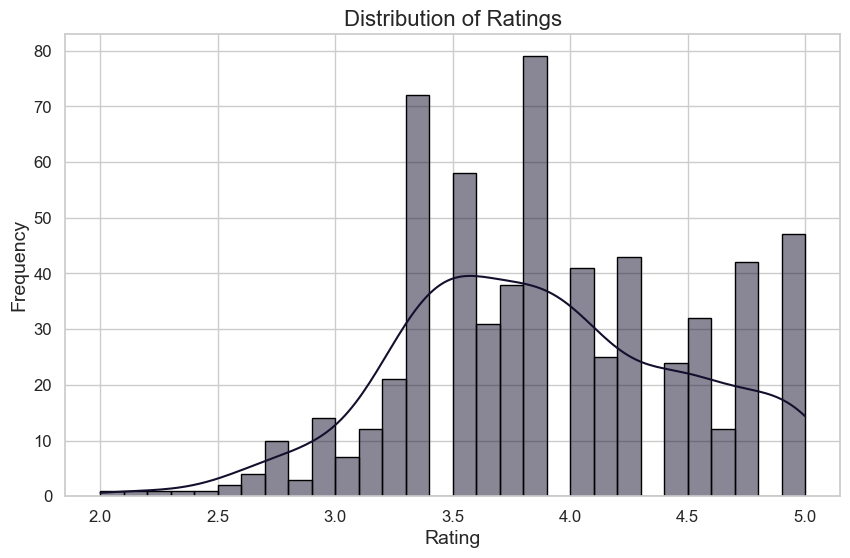

In [220]:
# See the rating column histplot, Is it skewed
plt.figure(figsize=(10, 6))
sns.histplot(x='Rating', data=df, bins=30, kde=True, edgecolor='black', color=custom_colors[2])

# Add titles and labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [221]:
# The median is more robust to skewness and outliers compared to the mean.
# In right-skewed distributions, the mean can be disproportionately affected by high values,
# which may lead to an inaccurate estimation of the central tendency for imputation.
# By using the median, we ensure that the imputed values are not skewed by extreme ratings, 
# resulting in a more reliable representation of the typical rating in the dataset.
# This approach is particularly useful when we want to maintain the integrity of the data
# and avoid introducing bias due to outliers.
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [222]:
df['CompanySize'].value_counts()

CompanySize
51-200        135
1001-5000     104
1-50           86
201-500        85
10000++        80
501-1000       77
5001-10000     61
Name: count, dtype: int64

In [225]:
df['CompanySize'].fillna('Unknown', inplace=True)

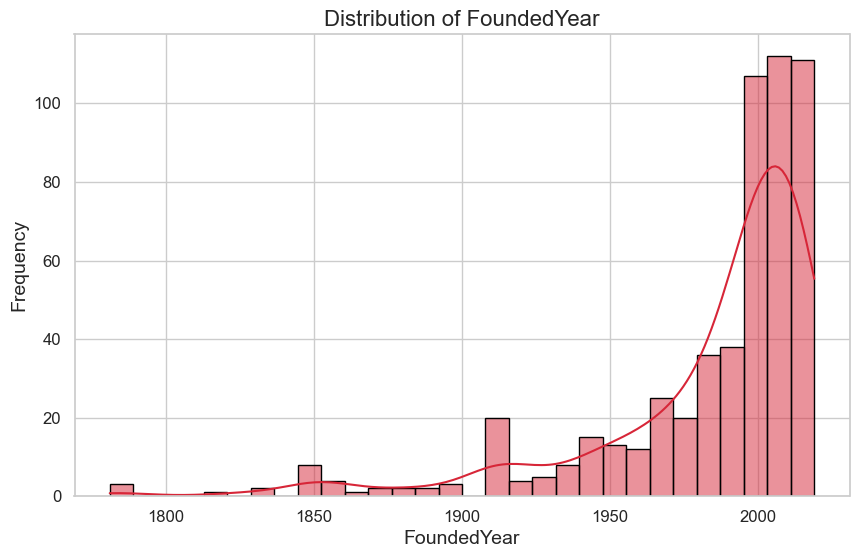

In [224]:
# See the FoundedYear column histplot, Is it skewed
plt.figure(figsize=(10, 6))
sns.histplot(x='FoundedYear', data=df, bins=30, kde=True, color=custom_colors[0], edgecolor='black')

# Add titles and labels
plt.title('Distribution of FoundedYear', fontsize=16)
plt.xlabel('FoundedYear', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [226]:
# The median is chosen for imputing missing values in 'FoundedYear' because it is less affected by outliers 
# and provides a more accurate central tendency measure for skewed data. 
# In cases where the data may include extreme values (e.g., very recent or very old companies),
# the mean can be skewed, potentially leading to misleading imputed values. 
# By filling missing values with the median, we preserve the overall distribution of the data 
# and reduce the risk of introducing bias. 
# This ensures that the imputed 'FoundedYear' reflects a more typical founding year for companies 
# in the dataset.
df['FoundedYear'].fillna(df['FoundedYear'].median(), inplace=True)

In [227]:
# Drop rows with missing values in the OwnershipType column
df.dropna(subset=['OwnershipType'], inplace=True)

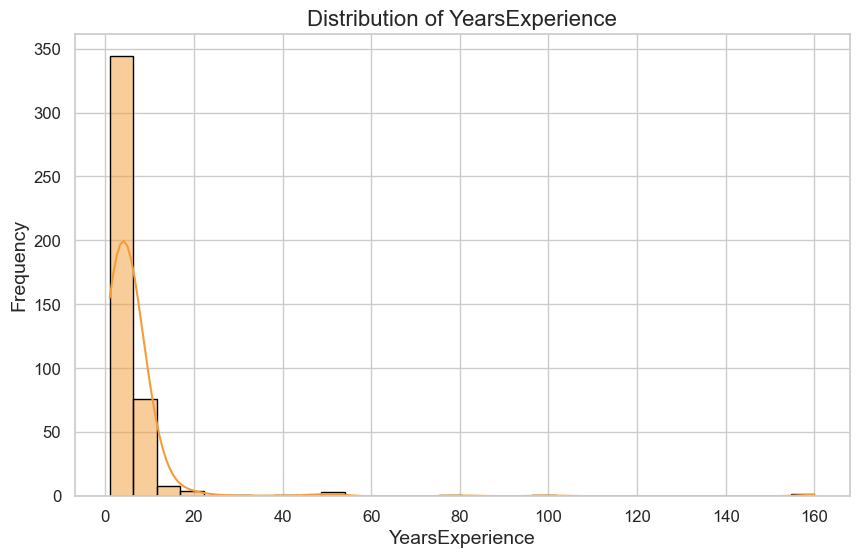

In [228]:
# See the YearsExperience column histplot, Is it skewed
plt.figure(figsize=(10, 6))
sns.histplot(x='YearsExperience', data=df, bins=30, kde=True, color=custom_colors[3], edgecolor='black')

# Add titles and labels
plt.title('Distribution of YearsExperience', fontsize=16)
plt.xlabel('YearsExperience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [229]:
# KNN imputation is utilized for filling missing values in 'YearsExperience' and 'AverageRevenue' 
# due to its ability to capture the underlying structure of the data based on the proximity of observations.
# In left-skewed distributions, the data may have a significant number of lower values, 
# making it important to consider the relationships among different data points.
# KNN leverages the values of the nearest neighbors (in this case, the 5 closest data points)
# to estimate missing values, allowing for a more nuanced and context-aware imputation.
# This method can help maintain the distribution characteristics of both 'YearsExperience' 
# and 'AverageRevenue', resulting in more accurate and reliable filled values compared to simpler methods like mean or median.
knn_imputer = KNNImputer(n_neighbors=5)
df[['YearsExperience', 'AverageRevenue']] = knn_imputer.fit_transform(df[['YearsExperience', 'AverageRevenue']])

In [230]:
# To calculate 'CompanyAge', we subtract the 'FoundedYear' from the current year (2024 in this case).
# This method directly derives the age of the company based on when it was founded.
# By filling missing values in 'CompanyAge' using this approach, we ensure that all records
# have a consistent and accurate age calculation.
# The inplace=True argument ensures that the DataFrame is updated in place, without the need for reassignment.
df['CompanyAge'].fillna(2024 - df['FoundedYear'], inplace=True)

In [231]:
df['OwnershipType'].replace('-1', df['OwnershipType'].mode()[0], inplace=True)
df['Sector'].replace('-1', df['Sector'].mode()[0], inplace=True)

In [232]:
# Replace '-1' in 'Industry' using loc
df.loc[df['Industry'] == '-1', 'Industry'] = np.nan
df['Industry'].fillna(df['Industry'].mode()[0], inplace=True)

In [233]:
df.isnull().sum()

index                  0
JobTitle               0
SalaryEstimate         0
Rating                 0
CompanyName            0
CompanySize            0
FoundedYear            0
OwnershipType          0
Industry               0
Sector                 0
RequiredSkills         0
EducationLevel         0
YearsExperience        0
SalaryMin              0
SalaryMax              0
AverageSalary          0
State                  0
City                   0
CompanyAge             0
AverageRevenue         0
NumberOfCompetitors    0
ExperienceLevel        0
SalaryCategory         0
dtype: int64

In [234]:
df.describe()

index      Rating  FoundedYear  YearsExperience      SalaryMin  \
count  668.000000  668.000000   668.000000       668.000000     668.000000   
mean   334.802395    3.874401  1986.646707         6.101598   99190.119760   
std    194.210121    0.588129    37.439179        10.660060   33091.369914   
min      0.000000    2.000000  1781.000000         1.000000   31000.000000   
25%    166.750000    3.500000  1983.000000         3.000000   79000.000000   
50%    334.500000    3.800000  1999.000000         5.000000   91000.000000   
75%    502.250000    4.300000  2009.000000         6.256236  122000.000000   
max    671.000000    5.000000  2019.000000       160.000000  212000.000000   

           SalaryMax  AverageSalary  CompanyAge  AverageRevenue  \
count     668.000000     668.000000  668.000000    6.680000e+02   
mean   148125.748503  123657.934132   37.353293    2.518344e+09   
std     48117.195714   39661.944569   37.439179    2.976148e+09   
min     56000.000000   43500.000000    5.000000    1.000000e+06   
25%    119000.000000  103000.000000   15.000000    2.066250e+08   
50%    133000.000000  114000.000000   25.000000    2.060000e+09   
75%    165000.000000  136500.000000   41.000000    3.500000e+09   
max    331000.000000  271500.000000  243.000000    1.000000e+10   

       NumberOfCompetitors  
count           668.000000  
mean              1.449102  
std               0.807823  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               3.000000

In [235]:
df.head()

index        JobTitle SalaryEstimate  Rating         CompanyName  \
0      0  data scientist        137-171     3.1         Healthfirst   
1      1  data scientist        137-171     4.2             ManTech   
2      2  data scientist        137-171     3.8      Analysis Group   
3      3  data scientist        137-171     3.5             INFICON   
4      4  data scientist        137-171     2.9  Affinity Solutions   

  CompanySize  FoundedYear            OwnershipType  \
0   1001-5000       1993.0   Nonprofit Organization   
1  5001-10000       1968.0                   Public   
2   1001-5000       1981.0  Private Practice / Firm   
3    501-1000       2000.0                   Public   
4      51-200       1998.0                  Private   

                                Industry             Sector  ... SalaryMin  \
0                     Insurance Carriers          Insurance  ...    137000   
1                 Research & Development  Business Services  ...    137000   
2                             Consulting  Business Services  ...    137000   
3  Electrical & Electronic Manufacturing      Manufacturing  ...    137000   
4                Advertising & Marketing  Business Services  ...    137000   

  SalaryMax  AverageSalary  State       City  CompanyAge AverageRevenue  \
0    171000         154000     NY   New York        31.0   2.173759e+09   
1    171000         154000     VA  Chantilly        56.0   1.500000e+09   
2    171000         154000     MA     Boston        43.0   3.000000e+08   
3    171000         154000     MA     Newton        24.0   3.000000e+08   
4    171000         154000     NY   New York        26.0   2.173759e+09   

  NumberOfCompetitors  ExperienceLevel  SalaryCategory  
0                   3        Mid-level          Medium  
1                   1        Mid-level          Medium  
2                   1        Mid-level          Medium  
3                   3        Mid-level          Medium  
4                   3        Mid-level          Medium  

[5 rows x 23 columns]

# Exploratory Data Analysis

### Job Title Distribution and Salary Analysis

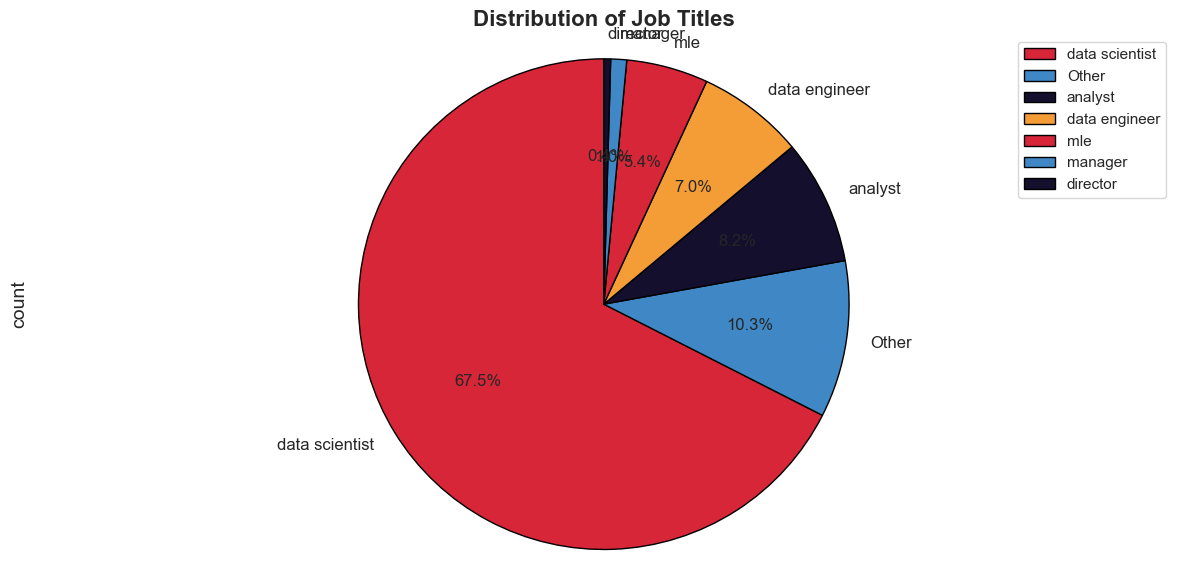

In [236]:
# Job title distribution
plt.figure(figsize=(12, 6))

df['JobTitle'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',   # Display percentage with one decimal
    colors=custom_colors,       # Apply custom color palette
    startangle=90,       # Start the pie chart at 90 degrees for better alignment
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'},  # Add border for better separation
    textprops={'fontsize': 12}  # Adjust font size for readability
)

# Add title and make the pie circular
plt.title('Distribution of Job Titles', fontsize=16, fontweight='bold')
plt.axis('equal')  # Ensures pie chart is a perfect circle

# Remove the legend 
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Add legend outside the plot if needed

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

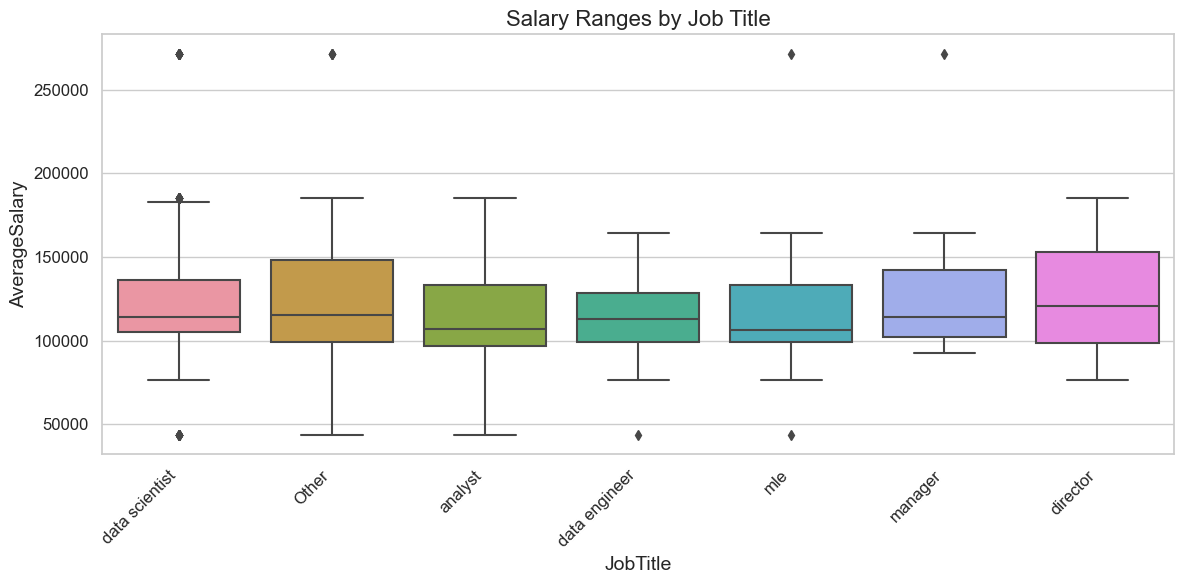

In [237]:
# Salary ranges for each job title
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobTitle', y='AverageSalary', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Ranges by Job Title')
plt.tight_layout()
plt.show()

In [238]:
# Most common job titles and their median salaries
top_jobs = df['JobTitle'].value_counts().head()
median_salaries = df.groupby('JobTitle')['AverageSalary'].median().loc[top_jobs.index]
print("\nMost common job titles and their median salaries:")
print(pd.concat([top_jobs, median_salaries], axis=1).rename(columns={'JobTitle': 'Count', 'AverageSalary': 'Median Salary'}))


Most common job titles and their median salaries:
                count  Median Salary
JobTitle                            
data scientist    451       114000.0
Other              69       115500.0
analyst            55       107000.0
data engineer      47       113000.0
mle                36       106500.0


## Company Size, Salary, and Ratings Analysis

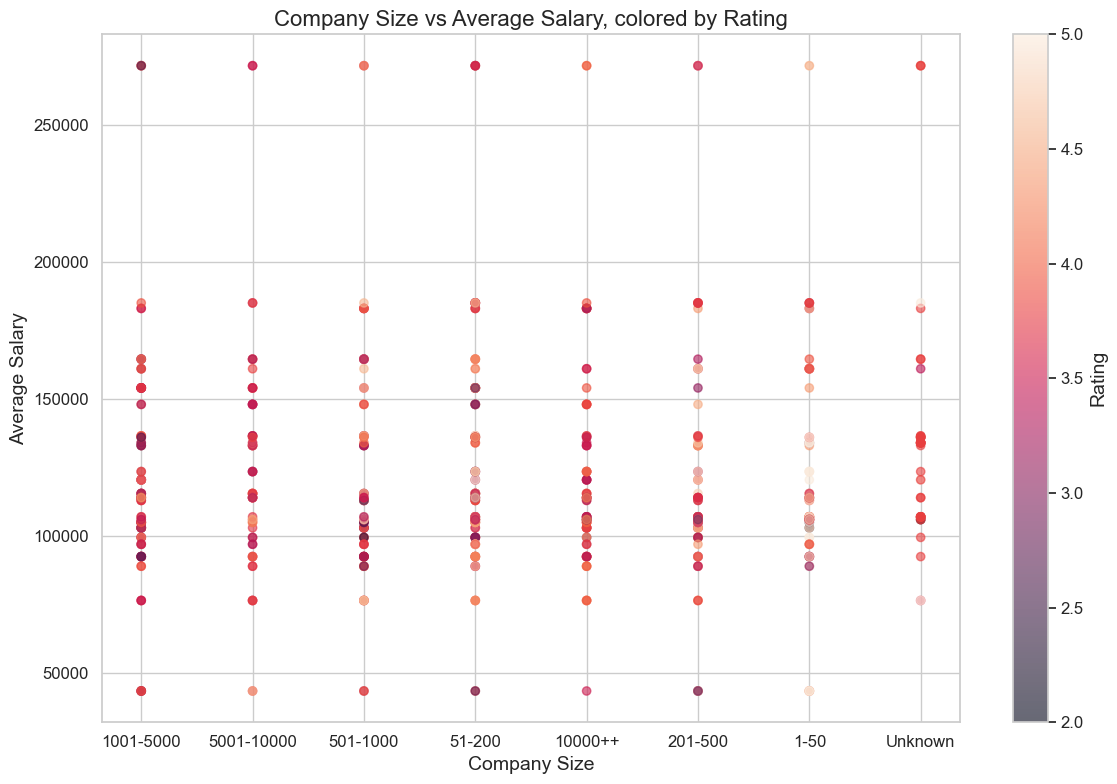

In [239]:
# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['CompanySize'], df['AverageSalary'], c=df['Rating'], alpha=0.6)
plt.colorbar(scatter, label='Rating')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Company Size vs Average Salary, colored by Rating')
plt.tight_layout()
plt.show()


In [240]:
# Correlation coefficients
corr_size_salary = df['CompanySize'].astype('category').cat.codes.corr(df['AverageSalary'])
corr_size_rating = df['CompanySize'].astype('category').cat.codes.corr(df['Rating'])
corr_salary_rating = df['AverageSalary'].corr(df['Rating'])

In [241]:
print("Correlation coefficients:")
print(f"Company Size vs Average Salary: {corr_size_salary:.2f}")
print(f"Company Size vs Rating: {corr_size_rating:.2f}")
print(f"Average Salary vs Rating: {corr_salary_rating:.2f}")

Correlation coefficients:
Company Size vs Average Salary: 0.08
Company Size vs Rating: -0.05
Average Salary vs Rating: -0.00


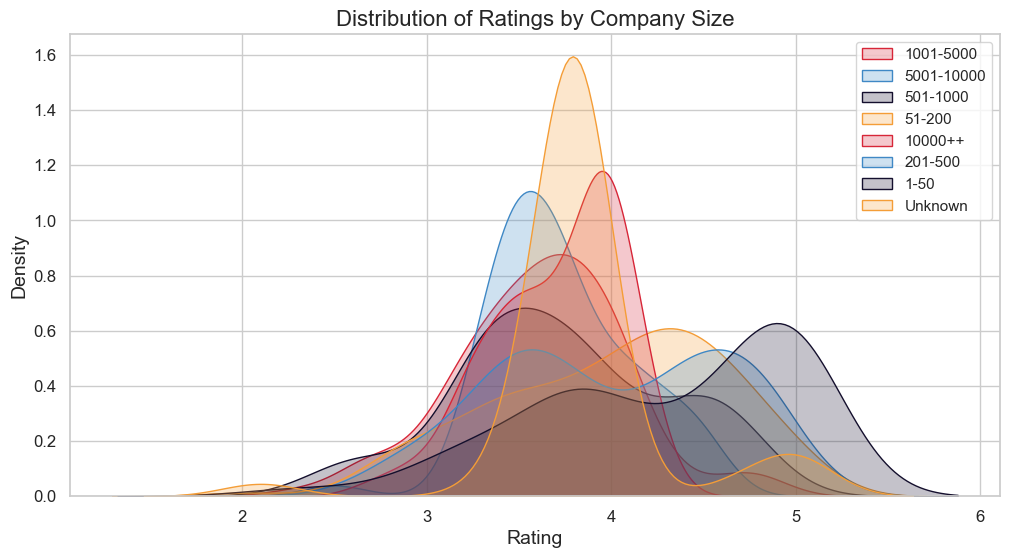

In [242]:
# KDE plot
plt.figure(figsize=(12, 6))
for size in df['CompanySize'].unique():
    sns.kdeplot(df[df['CompanySize'] == size]['Rating'], label=size, shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings by Company Size')
plt.legend()
plt.show()

In [243]:
# Size category with highest average salary and rating
size_stats = df.groupby('CompanySize').agg({
    'AverageSalary': 'mean',
    'Rating': 'mean'
}).sort_values('AverageSalary', ascending=False)

print("\nSize category with highest average salary:")
print(size_stats.head(1))


Size category with highest average salary:
             AverageSalary    Rating
CompanySize                         
Unknown      135738.095238  3.847619


## Salary Distribution by Education and Experience

In [244]:
# Explode the EducationLevel column
df_exploded = df.explode('EducationLevel')

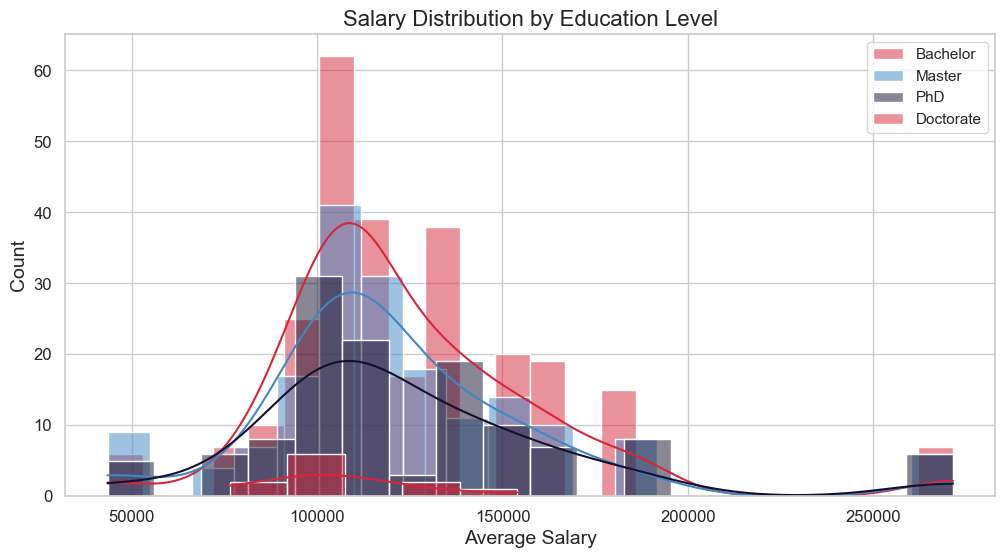

In [245]:
# Overlapping histograms
plt.figure(figsize=(12, 6))
for edu in df_exploded['EducationLevel'].unique():
    sns.histplot(df_exploded[df_exploded['EducationLevel'] == edu]['AverageSalary'], 
                 kde=True, label=edu, alpha=0.5)

plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Salary Distribution by Education Level')
plt.legend()
plt.show()

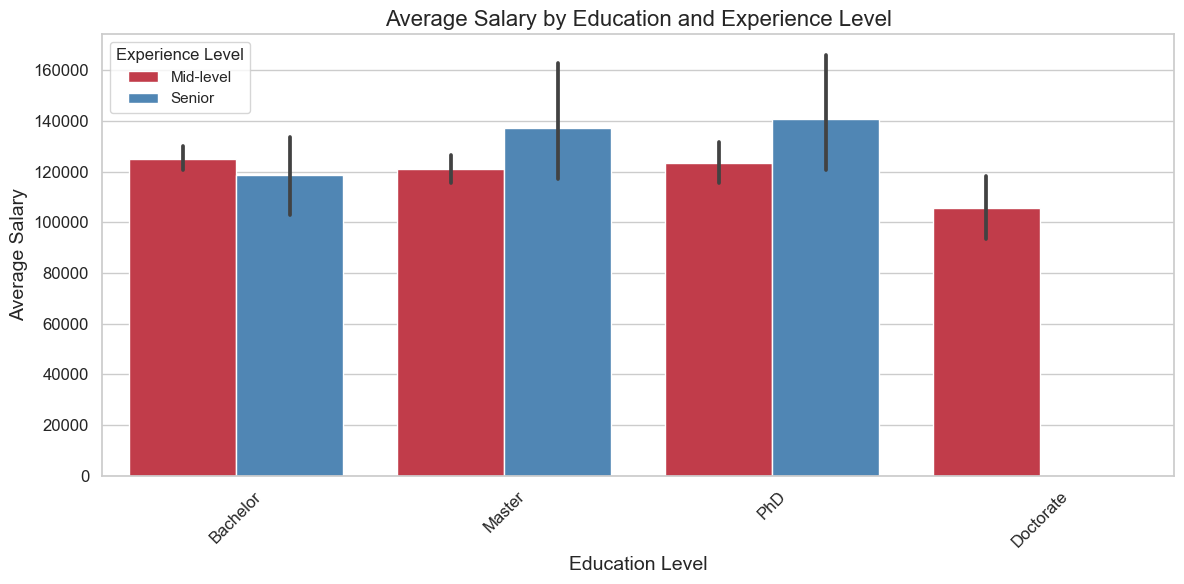

In [246]:
# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='EducationLevel', y='AverageSalary', hue='ExperienceLevel', data=df_exploded)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education and Experience Level')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

In [247]:
# Education-experience combination with highest average salary
highest_combo = df_exploded.groupby(['EducationLevel', 'ExperienceLevel'])['AverageSalary'].mean().idxmax()
highest_salary = df_exploded.groupby(['EducationLevel', 'ExperienceLevel'])['AverageSalary'].mean().max()

print(f"\nHighest average salary combination:")
print(f"Education: {highest_combo[0]}, Experience: {highest_combo[1]}")
print(f"Average Salary: ${highest_salary:.2f}")


Highest average salary combination:
Education: PhD, Experience: Senior
Average Salary: $140789.47


## Salary Trend by Founding Year and Sector

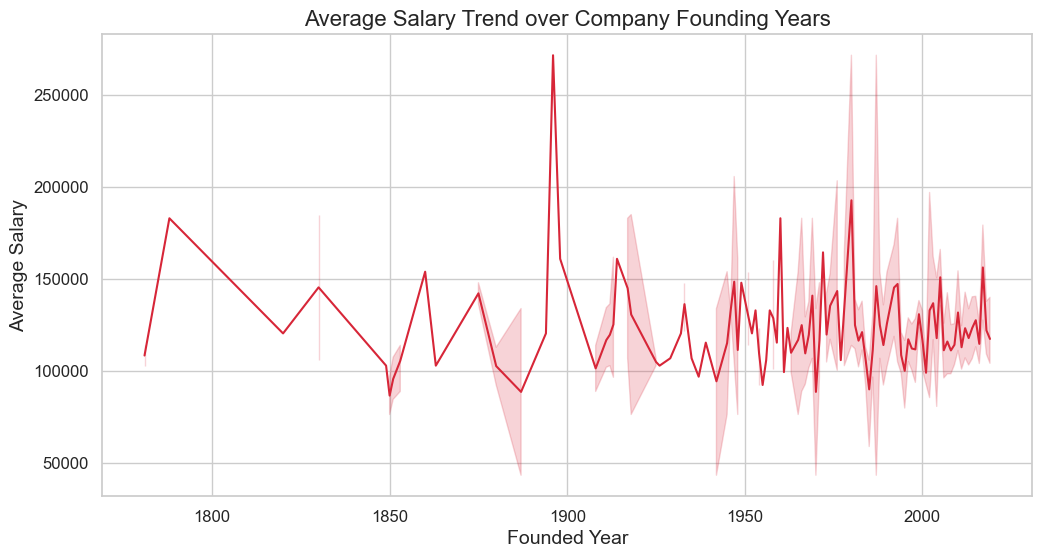

In [248]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='FoundedYear', y='AverageSalary', data=df)
plt.xlabel('Founded Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Trend over Company Founding Years')
plt.show()

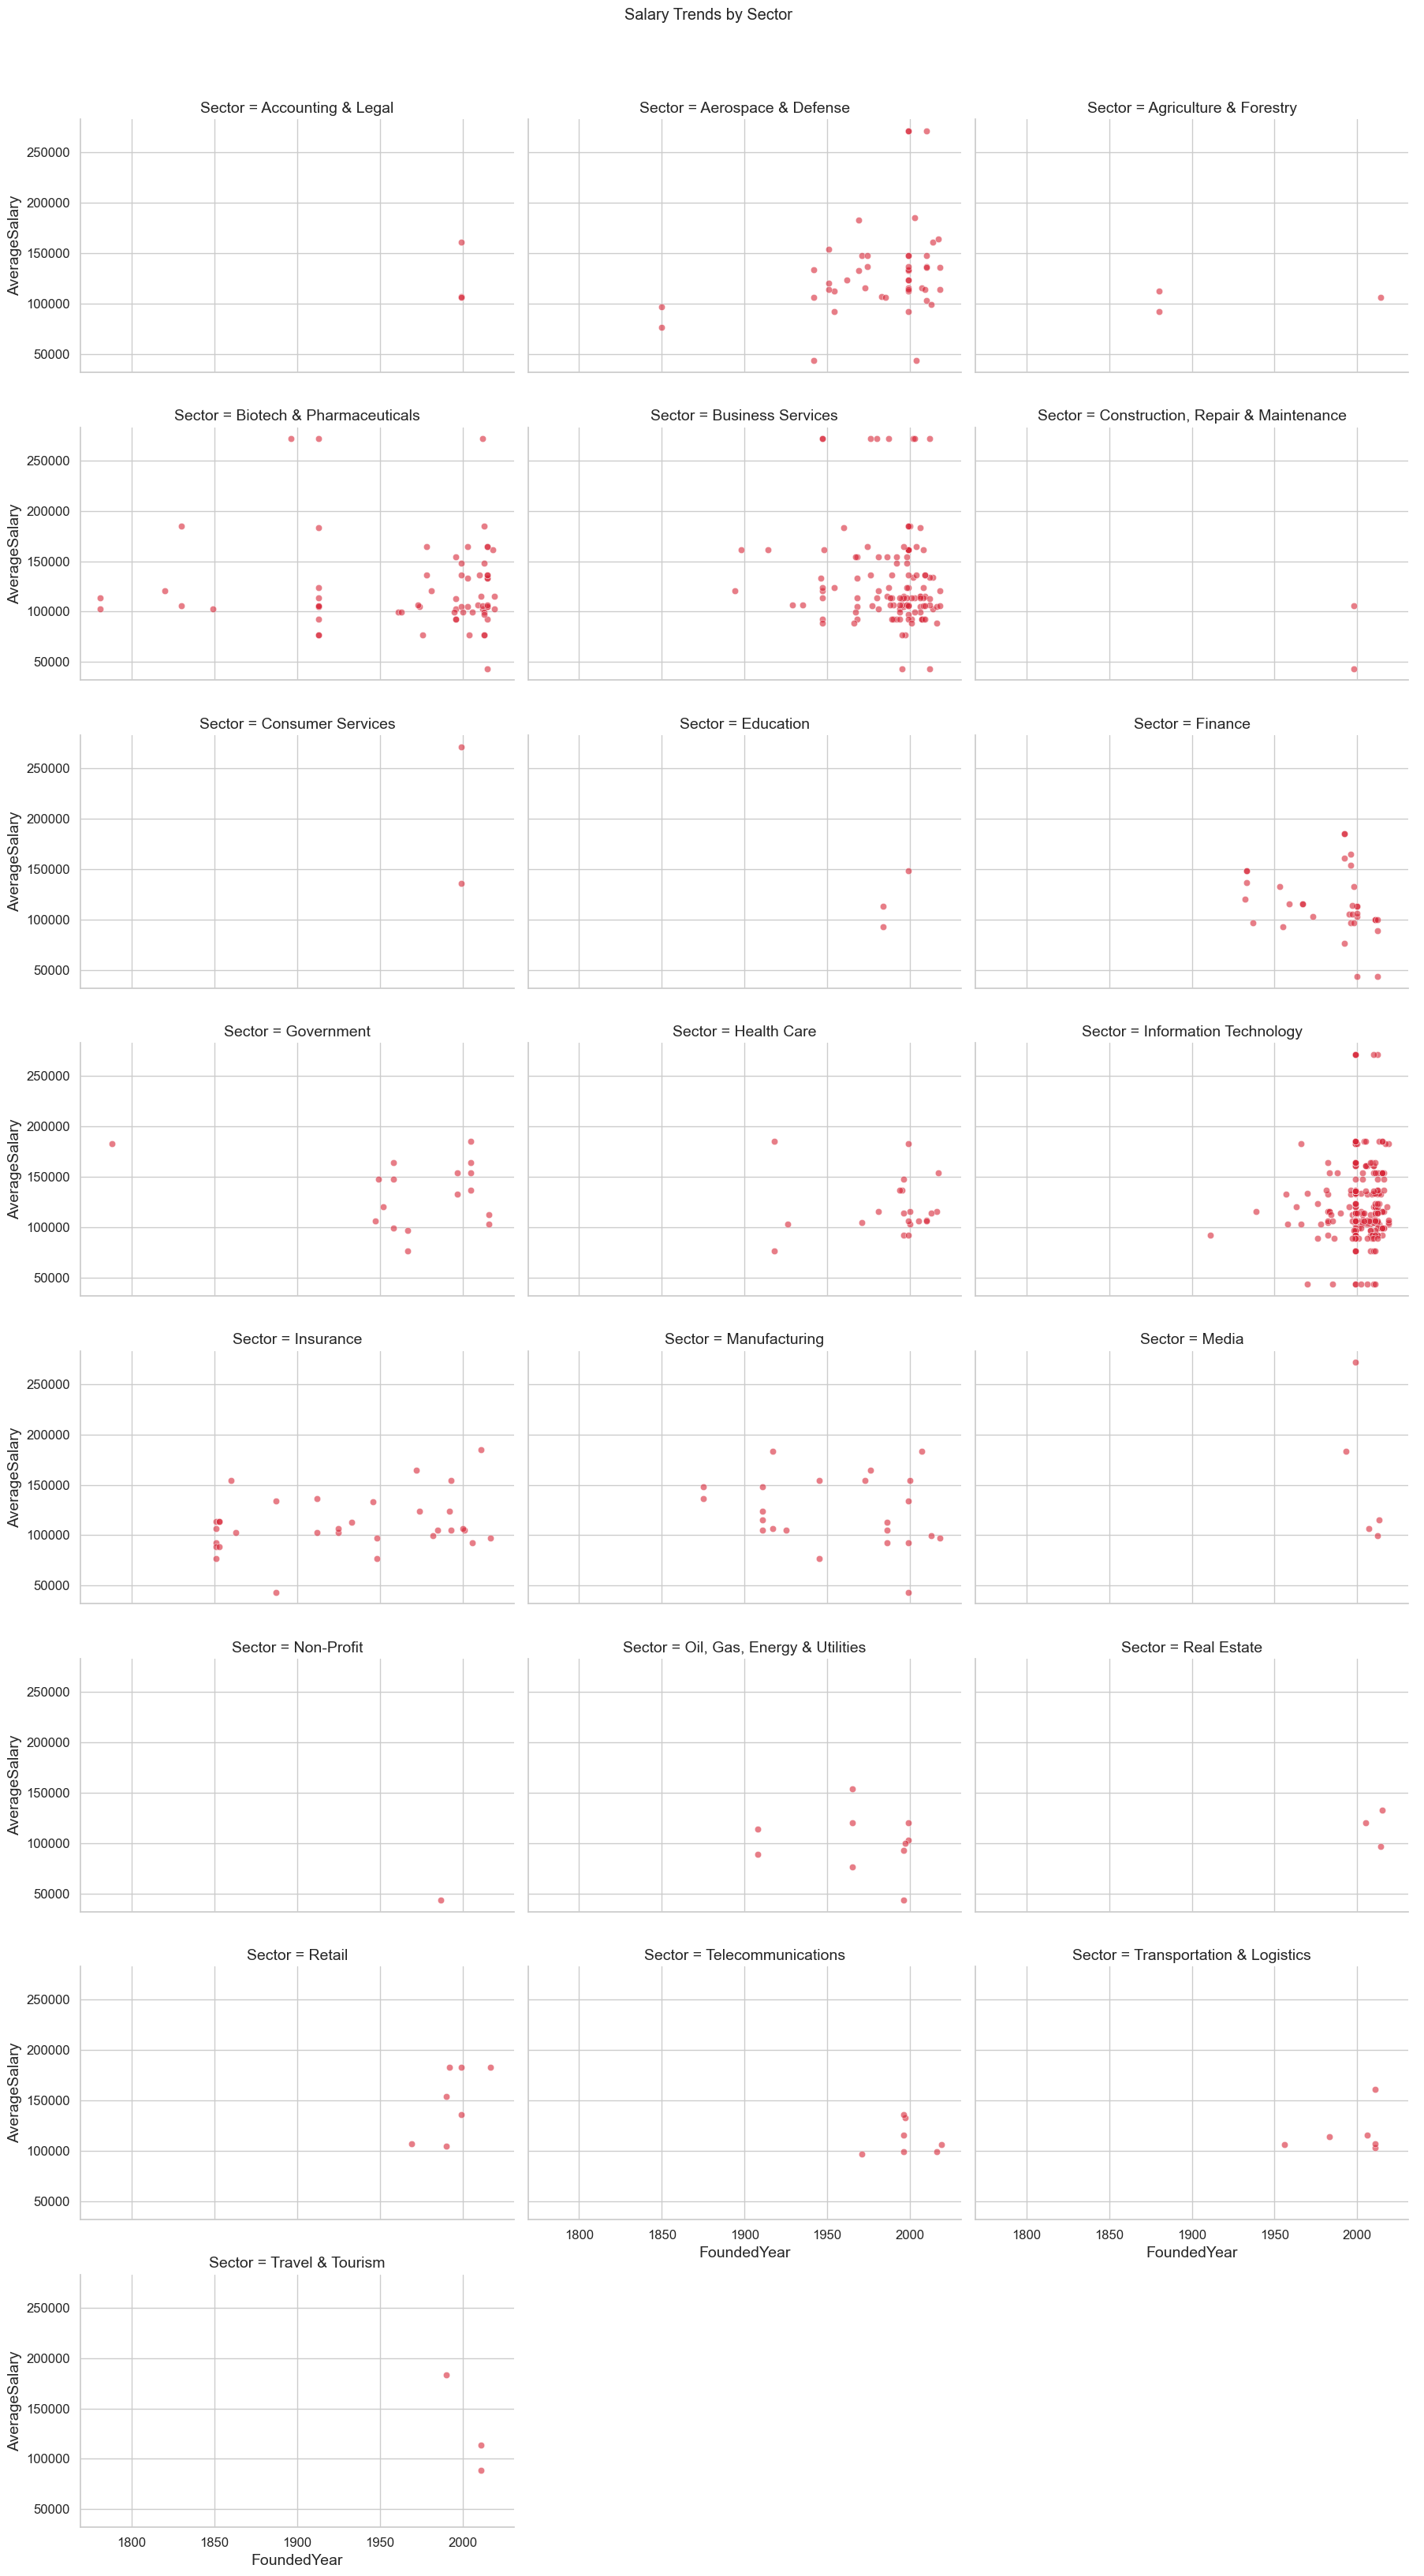

In [249]:
# Faceted scatter plot
g = sns.FacetGrid(df, col="Sector", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "FoundedYear", "AverageSalary", alpha=0.6)
g.add_legend()
g.fig.suptitle('Salary Trends by Sector', y=1.02)
plt.tight_layout()
plt.show()


In [250]:
from sklearn.linear_model import LinearRegression
# Sectors with steepest increase in salaries
sector_slopes = {}
for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector]
    X = sector_data[['FoundedYear']]
    y = sector_data['AverageSalary']
    reg = LinearRegression().fit(X, y)
    sector_slopes[sector] = reg.coef_[0]
top_sectors = sorted(sector_slopes.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 sectors with steepest increase in salaries:")
for sector, slope in top_sectors:
    print(f"{sector}: {slope:.2f}")


Top 5 sectors with steepest increase in salaries:
Education: 3016.67
Retail: 1635.66
Aerospace & Defense: 388.18
Transportation & Logistics: 299.80
Information Technology: 187.91


## Skills and Salary Correlation Analysis

In [251]:
# Explode the RequiredSkills column
df_exploded_skills = df.explode('RequiredSkills')

In [252]:
# Create binary columns for each skill
skills = df_exploded_skills['RequiredSkills'].str.get_dummies(', ')

In [253]:
print(skills.corr())

             C++      Java     Julia    Python         R       SQL     Scala
C++     1.000000 -0.065228 -0.014653 -0.124821 -0.155641 -0.101253 -0.065662
Java   -0.065228  1.000000 -0.020802 -0.177205 -0.220959 -0.143746 -0.093219
Julia  -0.014653 -0.020802  1.000000 -0.039807 -0.049636 -0.032291 -0.020940
Python -0.124821 -0.177205 -0.039807  1.000000 -0.422828 -0.275073 -0.178383
R      -0.155641 -0.220959 -0.049636 -0.422828  1.000000 -0.342992 -0.222428
SQL    -0.101253 -0.143746 -0.032291 -0.275073 -0.342992  1.000000 -0.144702
Scala  -0.065662 -0.093219 -0.020940 -0.178383 -0.222428 -0.144702  1.000000


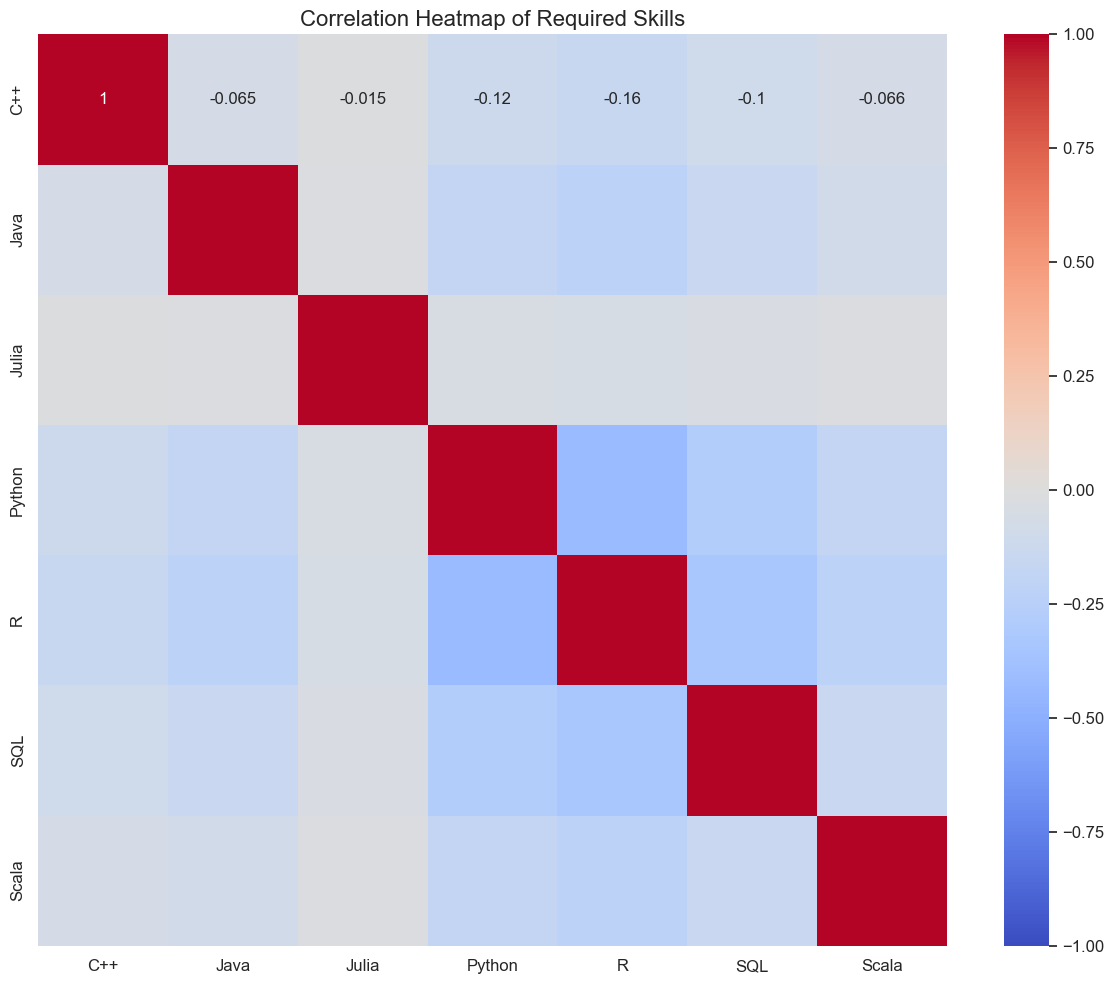

In [254]:
# Heatmap of skill correlations
plt.figure(figsize=(12, 10))
sns.heatmap(skills.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Required Skills')
plt.tight_layout()
plt.show()

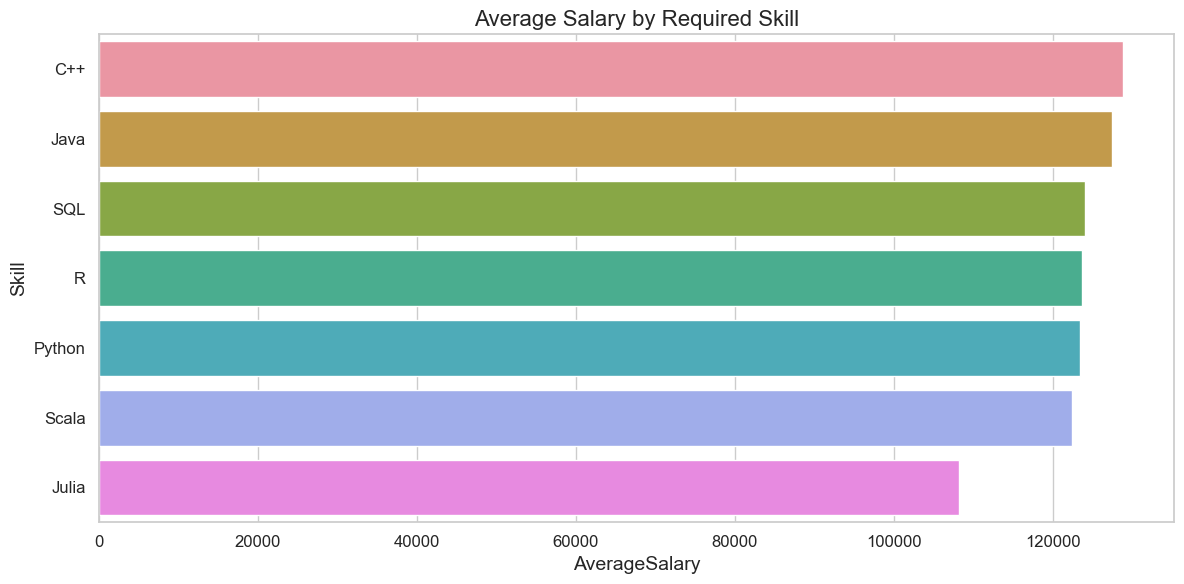

In [255]:
average_salaries = []
for skill in skills.columns:
    average_salary = df_exploded_skills[df_exploded_skills['RequiredSkills'] == skill]['AverageSalary'].mean()
    average_salaries.append(average_salary)

# Create a DataFrame for skills and their average salaries
skill_salaries = pd.DataFrame({
    'Skill': skills.columns,
    'AverageSalary': average_salaries
}).sort_values('AverageSalary', ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='AverageSalary', y='Skill', data=skill_salaries)
plt.title('Average Salary by Required Skill')
plt.tight_layout()
plt.show()


In [256]:
# Top 5 skills with highest impact on salary
top_skills = skill_salaries.head()
print("Top 5 skills with highest impact on salary:")
print(top_skills)

Top 5 skills with highest impact on salary:
    Skill  AverageSalary
0     C++  128764.705882
1    Java  127350.609756
5     SQL  123960.339943
4       R  123657.934132
3  Python  123413.265306


## Geographical  Distribution  of Jobs and Salaries

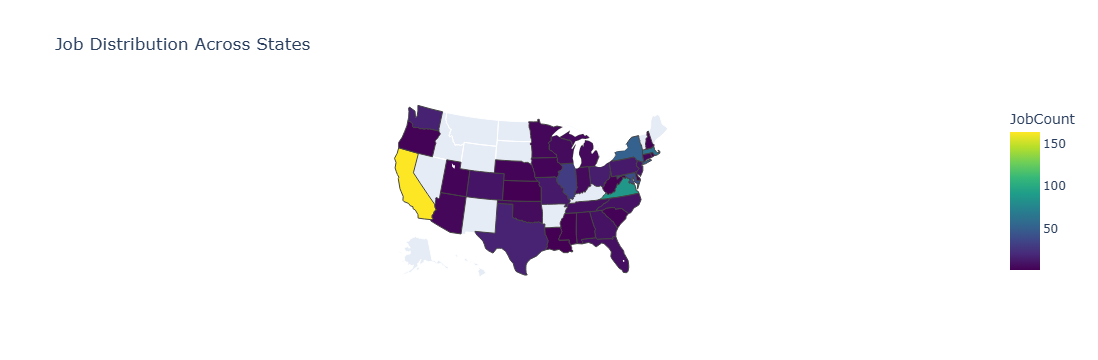

In [259]:
# Choropleth map of job counts by state
state_job_counts = df['State'].value_counts().reset_index()
state_job_counts.columns = ['State', 'JobCount']

fig = px.choropleth(state_job_counts,
                    locations='State', 
                    locationmode="USA-states", 
                    color='JobCount',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Job Distribution Across States")
fig.show()


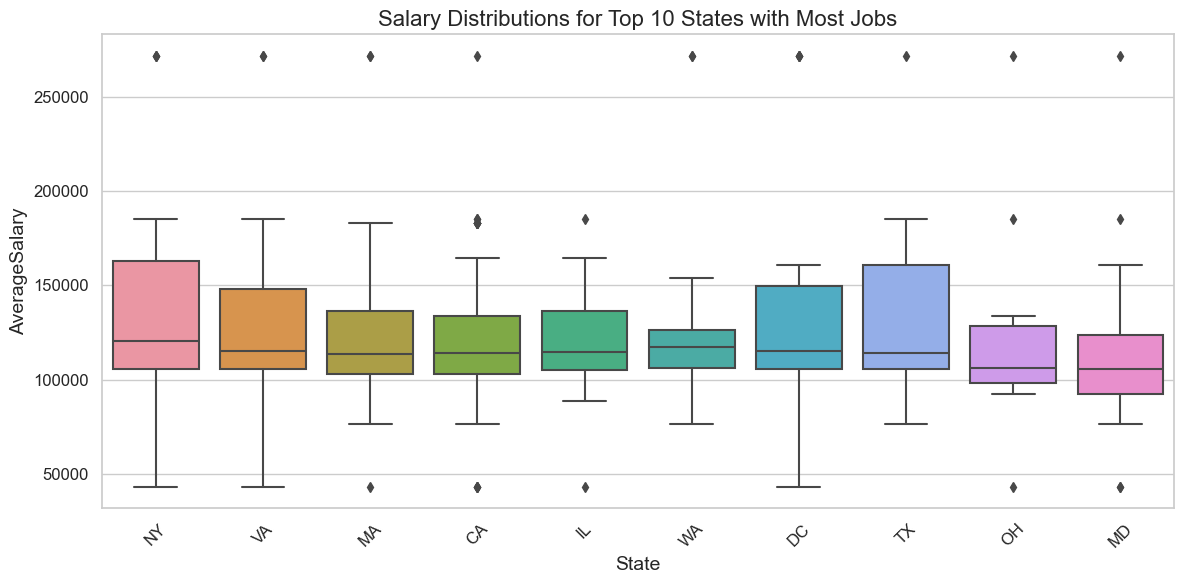

In [260]:
# Box plot of salary distributions for top 10 states
top_10_states = df['State'].value_counts().nlargest(10).index
df_top_10 = df[df['State'].isin(top_10_states)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='AverageSalary', data=df_top_10)
plt.title('Salary Distributions for Top 10 States with Most Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [261]:
state_stats = df.groupby('State').agg({
    'JobTitle': 'count',
    'AverageSalary': 'median'
}).sort_values('JobTitle', ascending=False).head(5)

print("\nTop 5 states with highest job concentration and their median salaries:")
print(state_stats)


Top 5 states with highest job concentration and their median salaries:
       JobTitle  AverageSalary
State                         
CA          164       114000.0
VA           87       115500.0
MA           62       113500.0
NY           51       120500.0
MD           40       106000.0


## Company Ownership Type Analysis

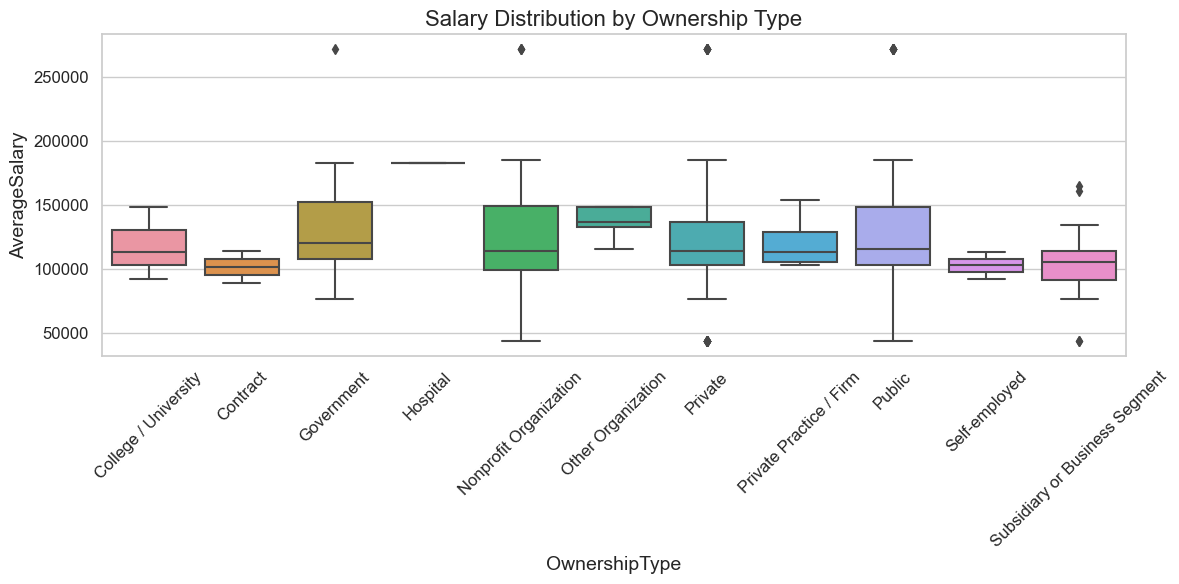

In [262]:
# Grouped box plot of salaries by ownership type
plt.figure(figsize=(12, 6))
sns.boxplot(x='OwnershipType', y='AverageSalary', data=df)
plt.title('Salary Distribution by Ownership Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

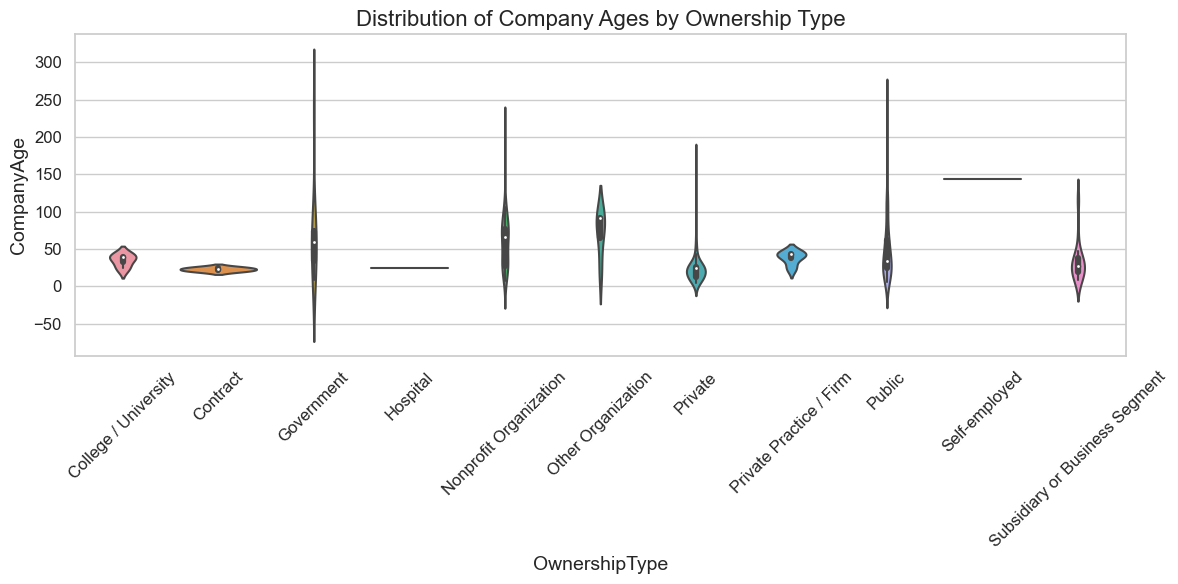

In [263]:
# Violin plot of company ages for each ownership type
plt.figure(figsize=(12, 6))
sns.violinplot(x='OwnershipType', y='CompanyAge', data=df)
plt.title('Distribution of Company Ages by Ownership Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [264]:
# Ownership type with highest median salary and oldest companies
ownership_stats = df.groupby('OwnershipType').agg({
    'AverageSalary': 'median',
    'CompanyAge': 'max'
}).sort_values('AverageSalary', ascending=False)

print("\nOwnership type statistics:")
print(ownership_stats)
print(f"\nOwnership type with highest median salary: {ownership_stats.index[0]}")
print(f"Ownership type with oldest companies: {ownership_stats['CompanyAge'].idxmax()}")


Ownership type statistics:
                                AverageSalary  CompanyAge
OwnershipType                                            
Hospital                             183000.0        25.0
Other Organization                   136500.0        91.0
Government                           120500.0       236.0
Public                               115500.0       243.0
Nonprofit Organization               114000.0       204.0
Private                              114000.0       173.0
Private Practice / Firm              113250.0        43.0
College / University                 113000.0        40.0
Subsidiary or Business Segment       105500.0       116.0
Self-employed                        102750.0       144.0
Contract                             101500.0        25.0

Ownership type with highest median salary: Hospital
Ownership type with oldest companies: Public


## Revenue, Competitors, and Salary Analysis

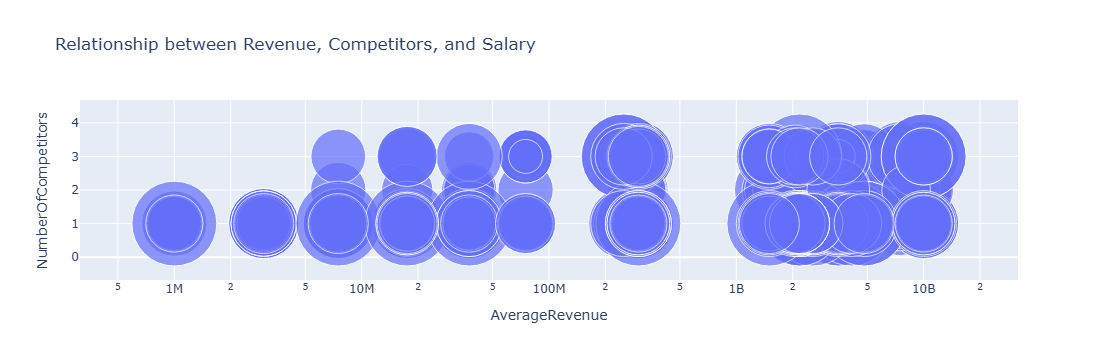

In [265]:
# Bubble chart
fig = px.scatter(df, x='AverageRevenue', y='NumberOfCompetitors', size='AverageSalary',
                 hover_name='CompanyName', log_x=True, size_max=60,
                 title='Relationship between Revenue, Competitors, and Salary')
fig.show()

In [266]:
# Calculate Spearman's rank correlation
corr_revenue_competitors = stats.spearmanr(df['AverageRevenue'], df['NumberOfCompetitors'])
corr_revenue_salary = stats.spearmanr(df['AverageRevenue'], df['AverageSalary'])
corr_competitors_salary = stats.spearmanr(df['NumberOfCompetitors'], df['AverageSalary'])

print("Spearman's rank correlation results:")
print(f"Revenue vs Competitors: {corr_revenue_competitors[0]:.2f} (p-value: {corr_revenue_competitors[1]:.4f})")
print(f"Revenue vs Salary: {corr_revenue_salary[0]:.2f} (p-value: {corr_revenue_salary[1]:.4f})")
print(f"Competitors vs Salary: {corr_competitors_salary[0]:.2f} (p-value: {corr_competitors_salary[1]:.4f})")

Spearman's rank correlation results:
Revenue vs Competitors: 0.12 (p-value: 0.0024)
Revenue vs Salary: 0.06 (p-value: 0.0935)
Competitors vs Salary: -0.00 (p-value: 0.9279)


In [267]:
# Find revenue-competitor combination associated with highest salaries
df['RevComp'] = df['AverageRevenue'].astype(str) + '_' + df['NumberOfCompetitors'].astype(str)
highest_salary_combo = df.groupby('RevComp')['AverageSalary'].mean().idxmax()
highest_salary = df.groupby('RevComp')['AverageSalary'].mean().max()

revenue, competitors = highest_salary_combo.split('_')
print(f"\nRevenue-competitor combination associated with highest salaries:")
print(f"Average Revenue: {revenue}")
print(f"Number of Competitors: {competitors}")
print(f"Average Salary: ${highest_salary:.2f}")


Revenue-competitor combination associated with highest salaries:
Average Revenue: 2060000000.0
Number of Competitors: 2
Average Salary: $271500.00


## Education, Skills, and Education Analysis

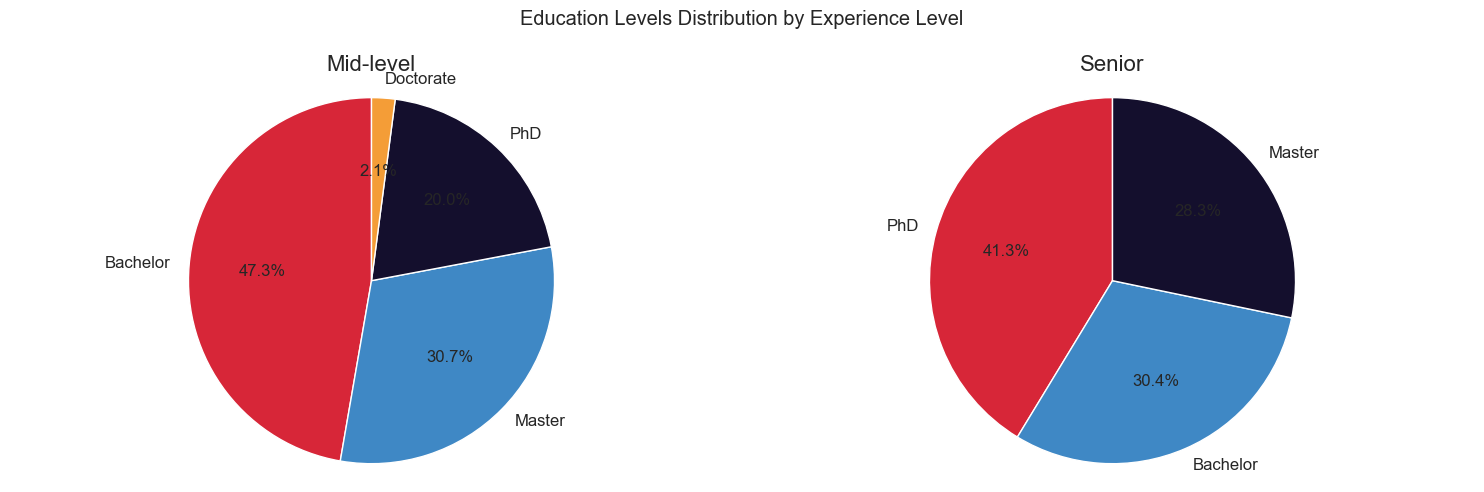

In [268]:
df_exploded_edu = df.explode('EducationLevel')

# Pie charts for each experience level
experience_levels = df_exploded_edu['ExperienceLevel'].unique()
fig, axes = plt.subplots(1, len(experience_levels), figsize=(15, 5))

for ax, exp_level in zip(axes, experience_levels):
    data = df_exploded_edu[df_exploded_edu['ExperienceLevel'] == exp_level]['EducationLevel'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(exp_level)

plt.suptitle('Education Levels Distribution by Experience Level')
plt.tight_layout()
plt.show()


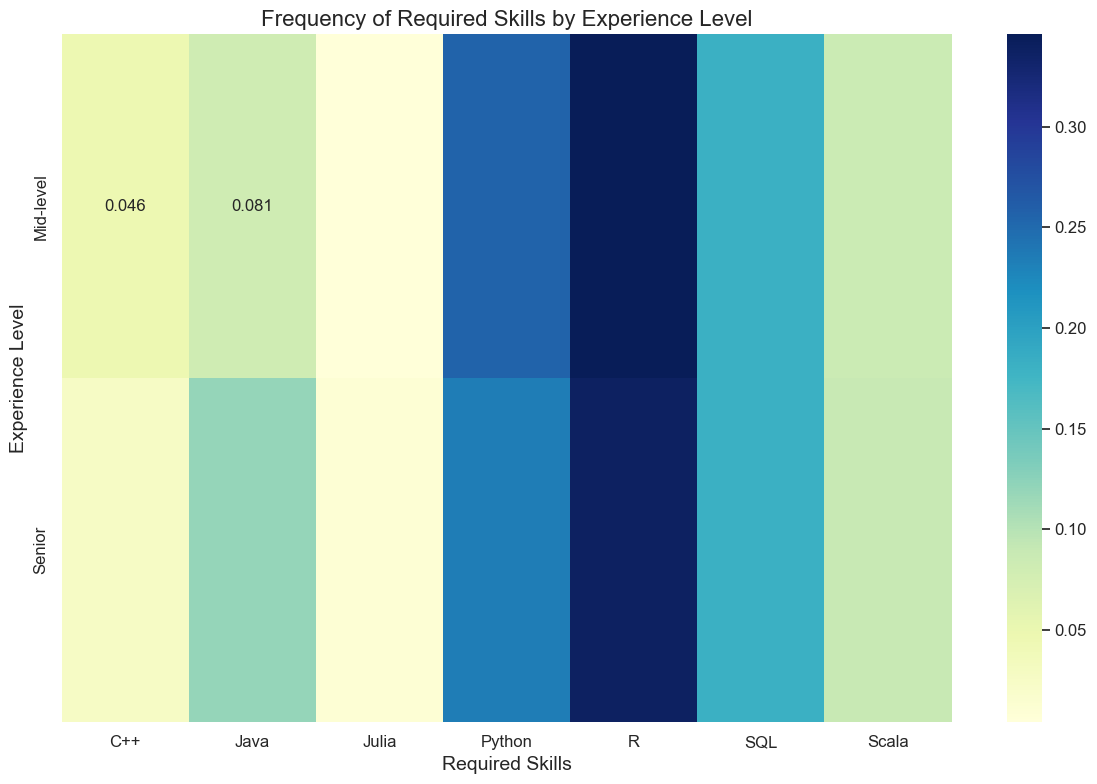

In [269]:
df_exploded_skills = df.explode('RequiredSkills')

skills = df_exploded_skills['RequiredSkills'].str.get_dummies(', ')

# Group by ExperienceLevel and calculate the mean of each skill
skill_exp = skills.groupby(df_exploded_skills['ExperienceLevel']).mean()

# Heatmap of required skills for each experience level
plt.figure(figsize=(12, 8))
sns.heatmap(skill_exp, annot=True, cmap='YlGnBu')
plt.title('Frequency of Required Skills by Experience Level')
plt.xlabel('Required Skills')
plt.ylabel('Experience Level')
plt.tight_layout()
plt.show()

In [270]:
# Explode the RequiredSkills column
df_exploded_skills = df.explode('RequiredSkills')

# Explode the EducationLevel column
df_exploded_edu = df_exploded_skills.explode('EducationLevel')

# Most common skill-education combinations for each experience level
for exp_level in df['ExperienceLevel'].unique():
    exp_df = df_exploded_edu[df_exploded_edu['ExperienceLevel'] == exp_level]
    
    # Find the most common education level
    top_edu = exp_df['EducationLevel'].mode().values[0]
    
    # Find the top 3 skills
    top_skills = exp_df['RequiredSkills'].value_counts().head(3).index.tolist()
    print(f"\nExperience Level: {exp_level}")
    print(f"Most common education: {top_edu}")
    print(f"Top 3 skills: {', '.join(top_skills)}")


Experience Level: Mid-level
Most common education: Bachelor
Top 3 skills: R, Python, SQL

Experience Level: Senior
Most common education: PhD
Top 3 skills: R, Python, SQL


## Salary Categories, Industries, and Ratings Analysis

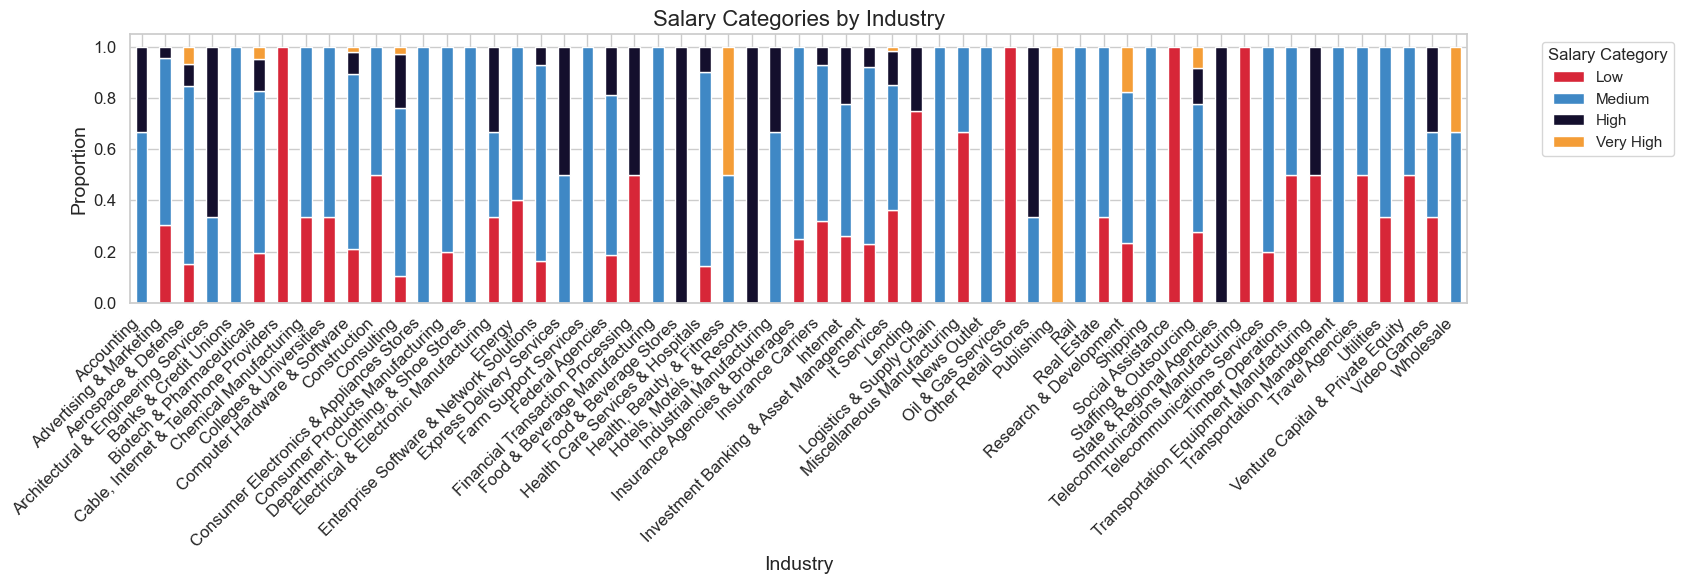

In [271]:
# Stacked bar chart of salary categories for each industry
salary_industry = pd.crosstab(df['Industry'], df['SalaryCategory'], normalize='index')
salary_industry.plot(kind='bar', stacked=True, figsize=(17, 6))
plt.title('Salary Categories by Industry')
plt.xlabel('Industry')
plt.ylabel('Proportion')
plt.legend(title='Salary Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [272]:
# Box plot of ratings for each salary category
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalaryCategory', y='Rating', data=df)
plt.title('Distribution of Ratings by Salary Category')
plt.tight_layout()
plt.show()


In [273]:
# Industries with the highest proportion of high-salary jobs and their average ratings
high_salary_prop = salary_industry['High'].sort_values(ascending=False).head(5)
industry_ratings = df.groupby('Industry')['Rating'].mean()

print("\nTop 5 industries with highest proportion of high-salary jobs:")
for industry in high_salary_prop.index:
    print(f"{industry}:")
    print(f"  Proportion of high-salary jobs: {high_salary_prop[industry]:.2%}")
    print(f"  Average rating: {industry_ratings[industry]:.2f}")


Top 5 industries with highest proportion of high-salary jobs:
State & Regional Agencies:
  Proportion of high-salary jobs: 100.00%
  Average rating: 3.20
Food & Beverage Stores:
  Proportion of high-salary jobs: 100.00%
  Average rating: 3.70
Hotels, Motels, & Resorts:
  Proportion of high-salary jobs: 100.00%
  Average rating: 3.50
Other Retail Stores:
  Proportion of high-salary jobs: 66.67%
  Average rating: 3.67
Architectural & Engineering Services:
  Proportion of high-salary jobs: 66.67%
  Average rating: 3.60


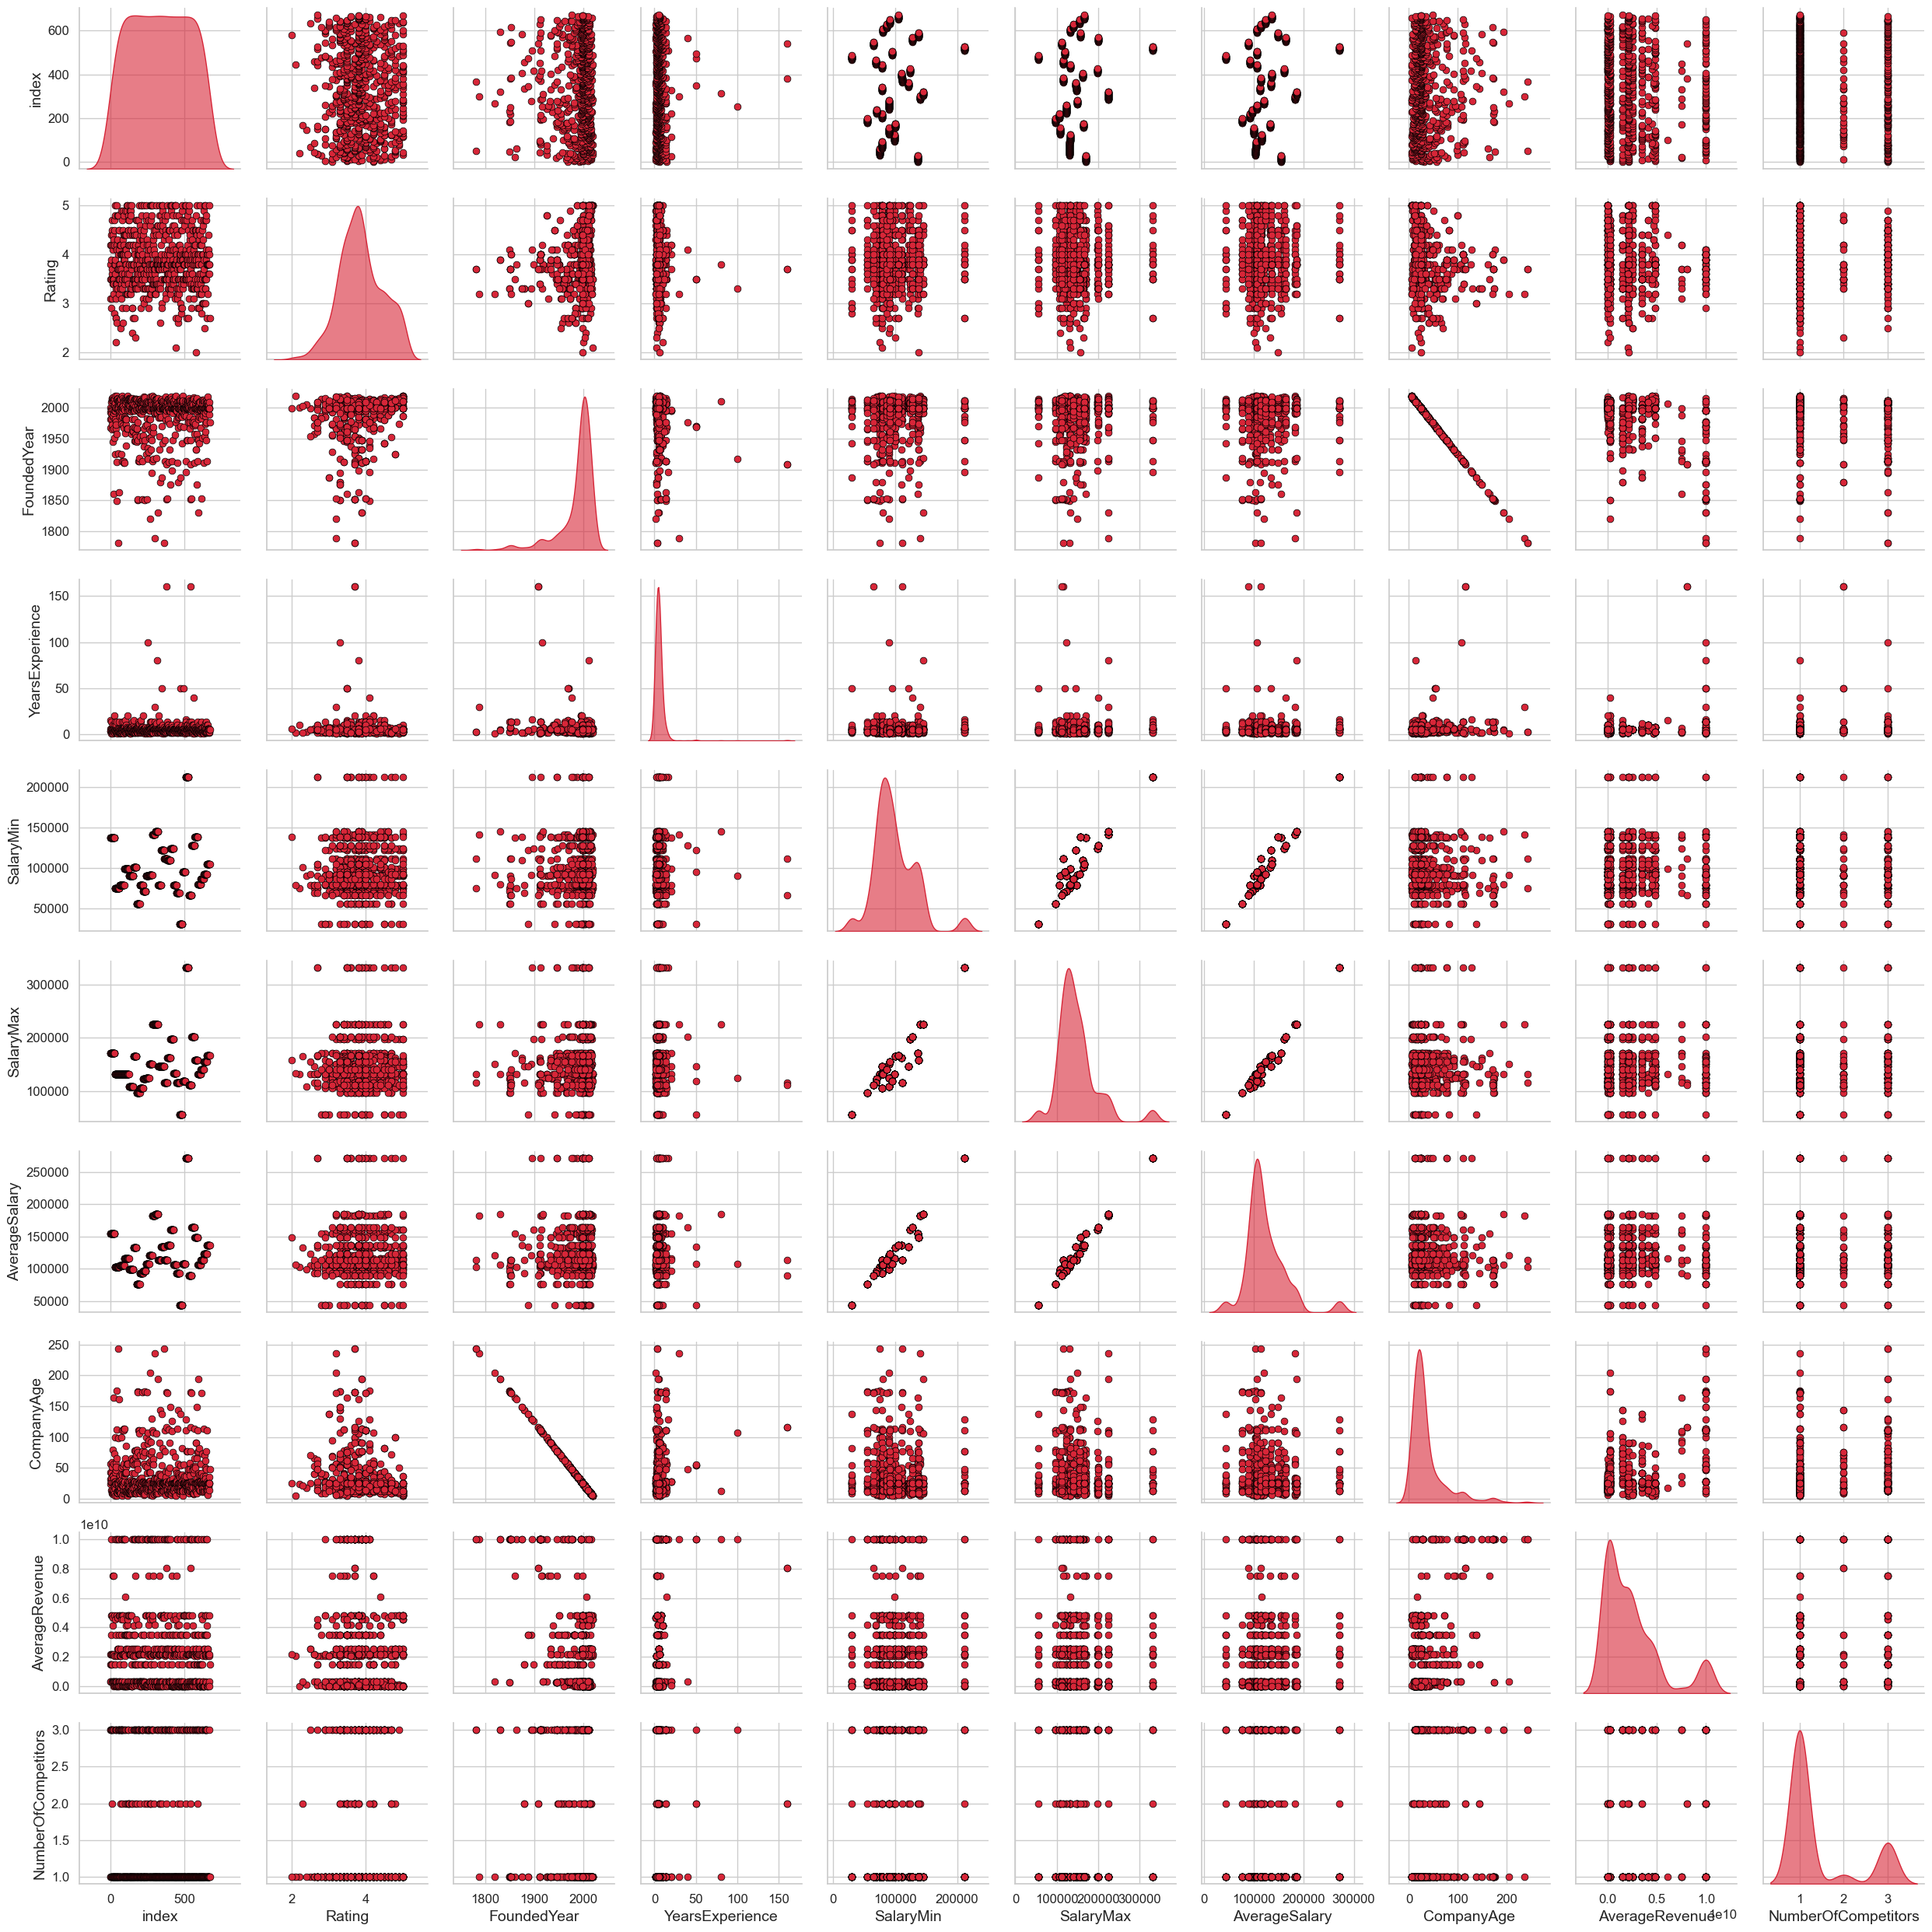

In [277]:
sns.pairplot(df, 
             palette=custom_colors,  # Use your custom palette
             markers=["o", "s", "D"],  # Different markers for better distinction
             plot_kws={'s': 40, 'edgecolor': 'k', 'linewidth': 0.5},  # Adjust marker size and style
             diag_kind='kde',  # Use KDE for diagonal plots
             diag_kws={'shade': True, 'alpha': 0.6},  # Adjust KDE shading
            )
# Improve the layout
plt.tight_layout()

# Display the plot
plt.show()


## Data Transformation

In [278]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set the number of rows and columns for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each numeric column and create a histplot with KDE
for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(df[column], kde=True, color=sns.color_palette("pastel")[i % 8], bins=10, stat='density', edgecolor='black')
    plt.title(column, fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [279]:
from scipy import stats

Skewness before transformation:
 FoundedYear        -2.528039
YearsExperience    10.975150
CompanyAge          2.528039
dtype: float64


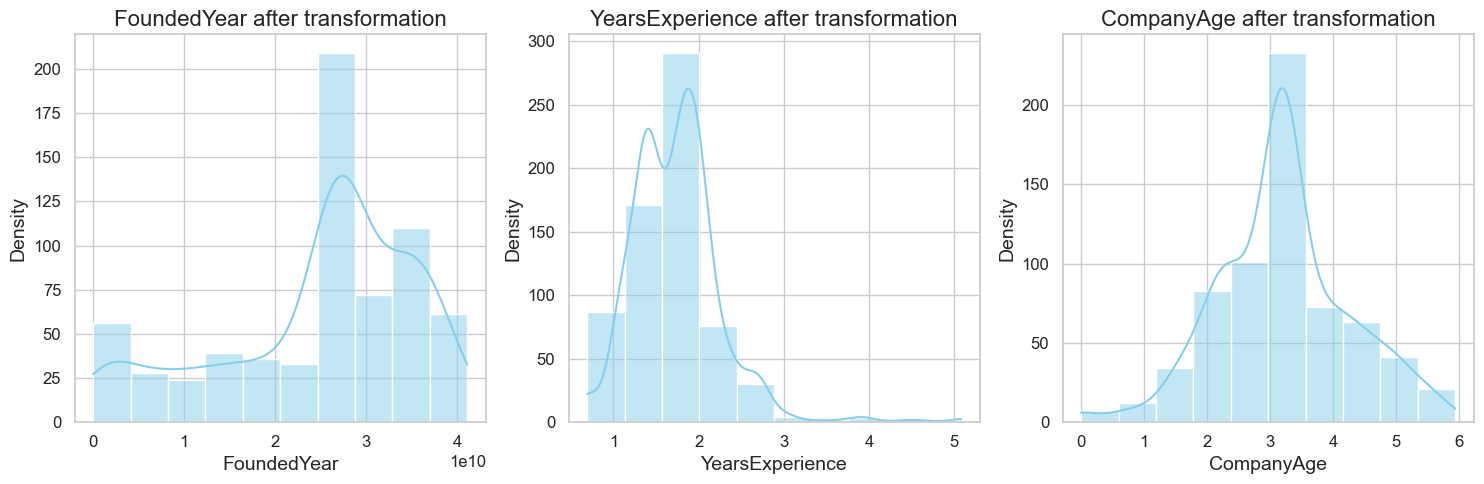

Skewness after transformation:
 FoundedYear       -0.828968
YearsExperience    1.625147
CompanyAge         0.003840
dtype: float64


In [280]:
# Function to visualize distributions
def plot_distributions(df, cols, title_suffix):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(cols):
        plt.subplot(1, len(cols), i + 1)
        sns.histplot(df[col], kde=True, color="skyblue", bins=10)
        plt.title(f'{col} {title_suffix}')
        plt.xlabel(col)
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()
# Step 1: Visualize original distributions
plot_distributions(df, ['FoundedYear', 'YearsExperience', 'CompanyAge'], 'before transformation')

# Step 2: Check skewness
skewness = df[['FoundedYear', 'YearsExperience', 'CompanyAge']].skew()
print("Skewness before transformation:\n", skewness)

# Step 3: Transform columns
# Apply Box-Cox transformation to FoundedYear and CompanyAge
def boxcox_transform(column):
    # Shift the data to avoid zero values
    transformed_column, _ = stats.boxcox(column - column.min() + 1)  
    return transformed_column

# Transform the columns
df['FoundedYear'] = boxcox_transform(df['FoundedYear'])
df['YearsExperience'] = np.log(df['YearsExperience'] + 1)  # Log transformation
df['CompanyAge'] = boxcox_transform(df['CompanyAge'])

# Step 4: Visualize transformed distributions
plot_distributions(df, ['FoundedYear', 'YearsExperience', 'CompanyAge'], 'after transformation')

# Check skewness after transformation
skewness_after = df[['FoundedYear', 'YearsExperience', 'CompanyAge']].skew()
print("Skewness after transformation:\n", skewness_after)

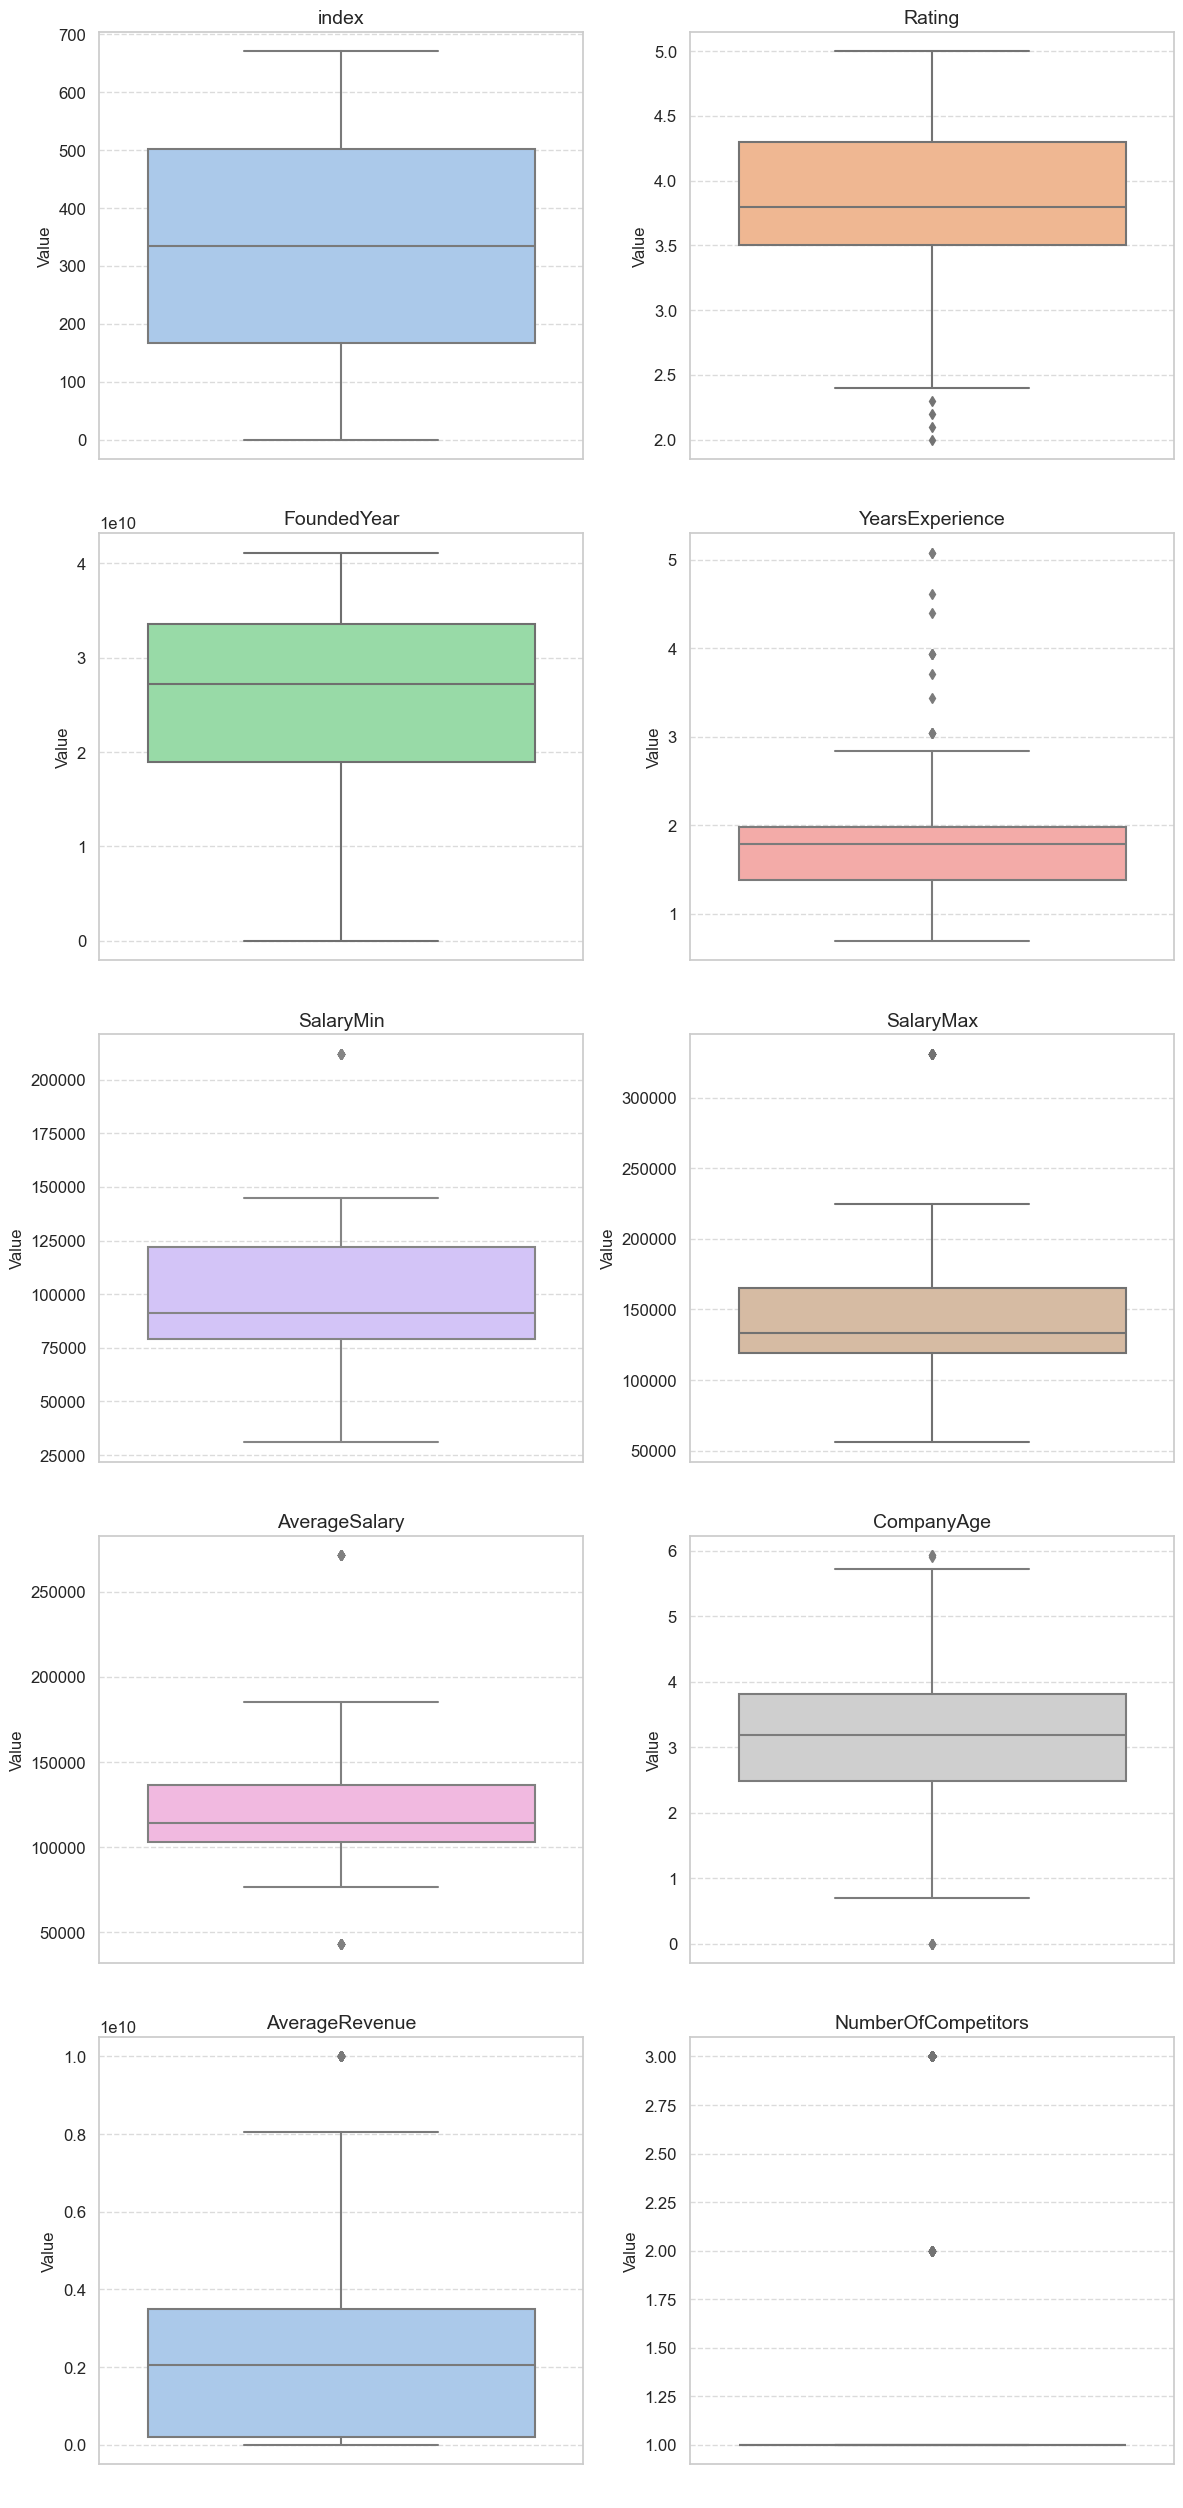

In [281]:
# Select the numeric col
numeric_col = df.select_dtypes(include='number')
# Set the number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each column and create a boxplot
for i, column in enumerate(numeric_col.columns):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[column], color=sns.color_palette("pastel")[i % 8])  # Use pastel colors
    plt.title(column, fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel(' ', fontsize=12)  # Label for the x-axis (empty for aesthetics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [282]:
# Function to count outliers using IQR method
def count_outliers(df):
    outlier_counts = {}
    
    # Loop through each numeric column
    for col in df.select_dtypes(include=['number']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

# Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]  # Number of outliers
    
    return outlier_counts 

# Get the number of outliers in each numeric column
outlier_counts = count_outliers(df)

# Print the number of outliers for each column
for col, count in outlier_counts.items():
    print(f'Number of outliers in {col}: {count}')
        

Number of outliers in index: 0
Number of outliers in Rating: 4
Number of outliers in FoundedYear: 0
Number of outliers in YearsExperience: 13
Number of outliers in SalaryMin: 21
Number of outliers in SalaryMax: 21
Number of outliers in AverageSalary: 41
Number of outliers in CompanyAge: 10
Number of outliers in AverageRevenue: 64
Number of outliers in NumberOfCompetitors: 165


## Outliers(Imputataion)

In [284]:
# Function to impute outliers with median
def impute_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with median
        median = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

# Impute outliers in the DataFrame
df_imputed = impute_outliers(df)

# Visualize the new boxplot after imputing outliers
def plot_boxplots(df):
    plt.figure(figsize=(10, 5))  # Adjusted figure size for clarity
    sns.set(style="whitegrid")  # Set a clean style

    # Create a horizontal boxplot
    sns.boxplot(data=df, orient="h", palette="pastel", fliersize=5)

    plt.title('Boxplot of Numeric Columns After Imputation', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot boxplots for the imputed DataFrame
plot_boxplots(df_imputed)


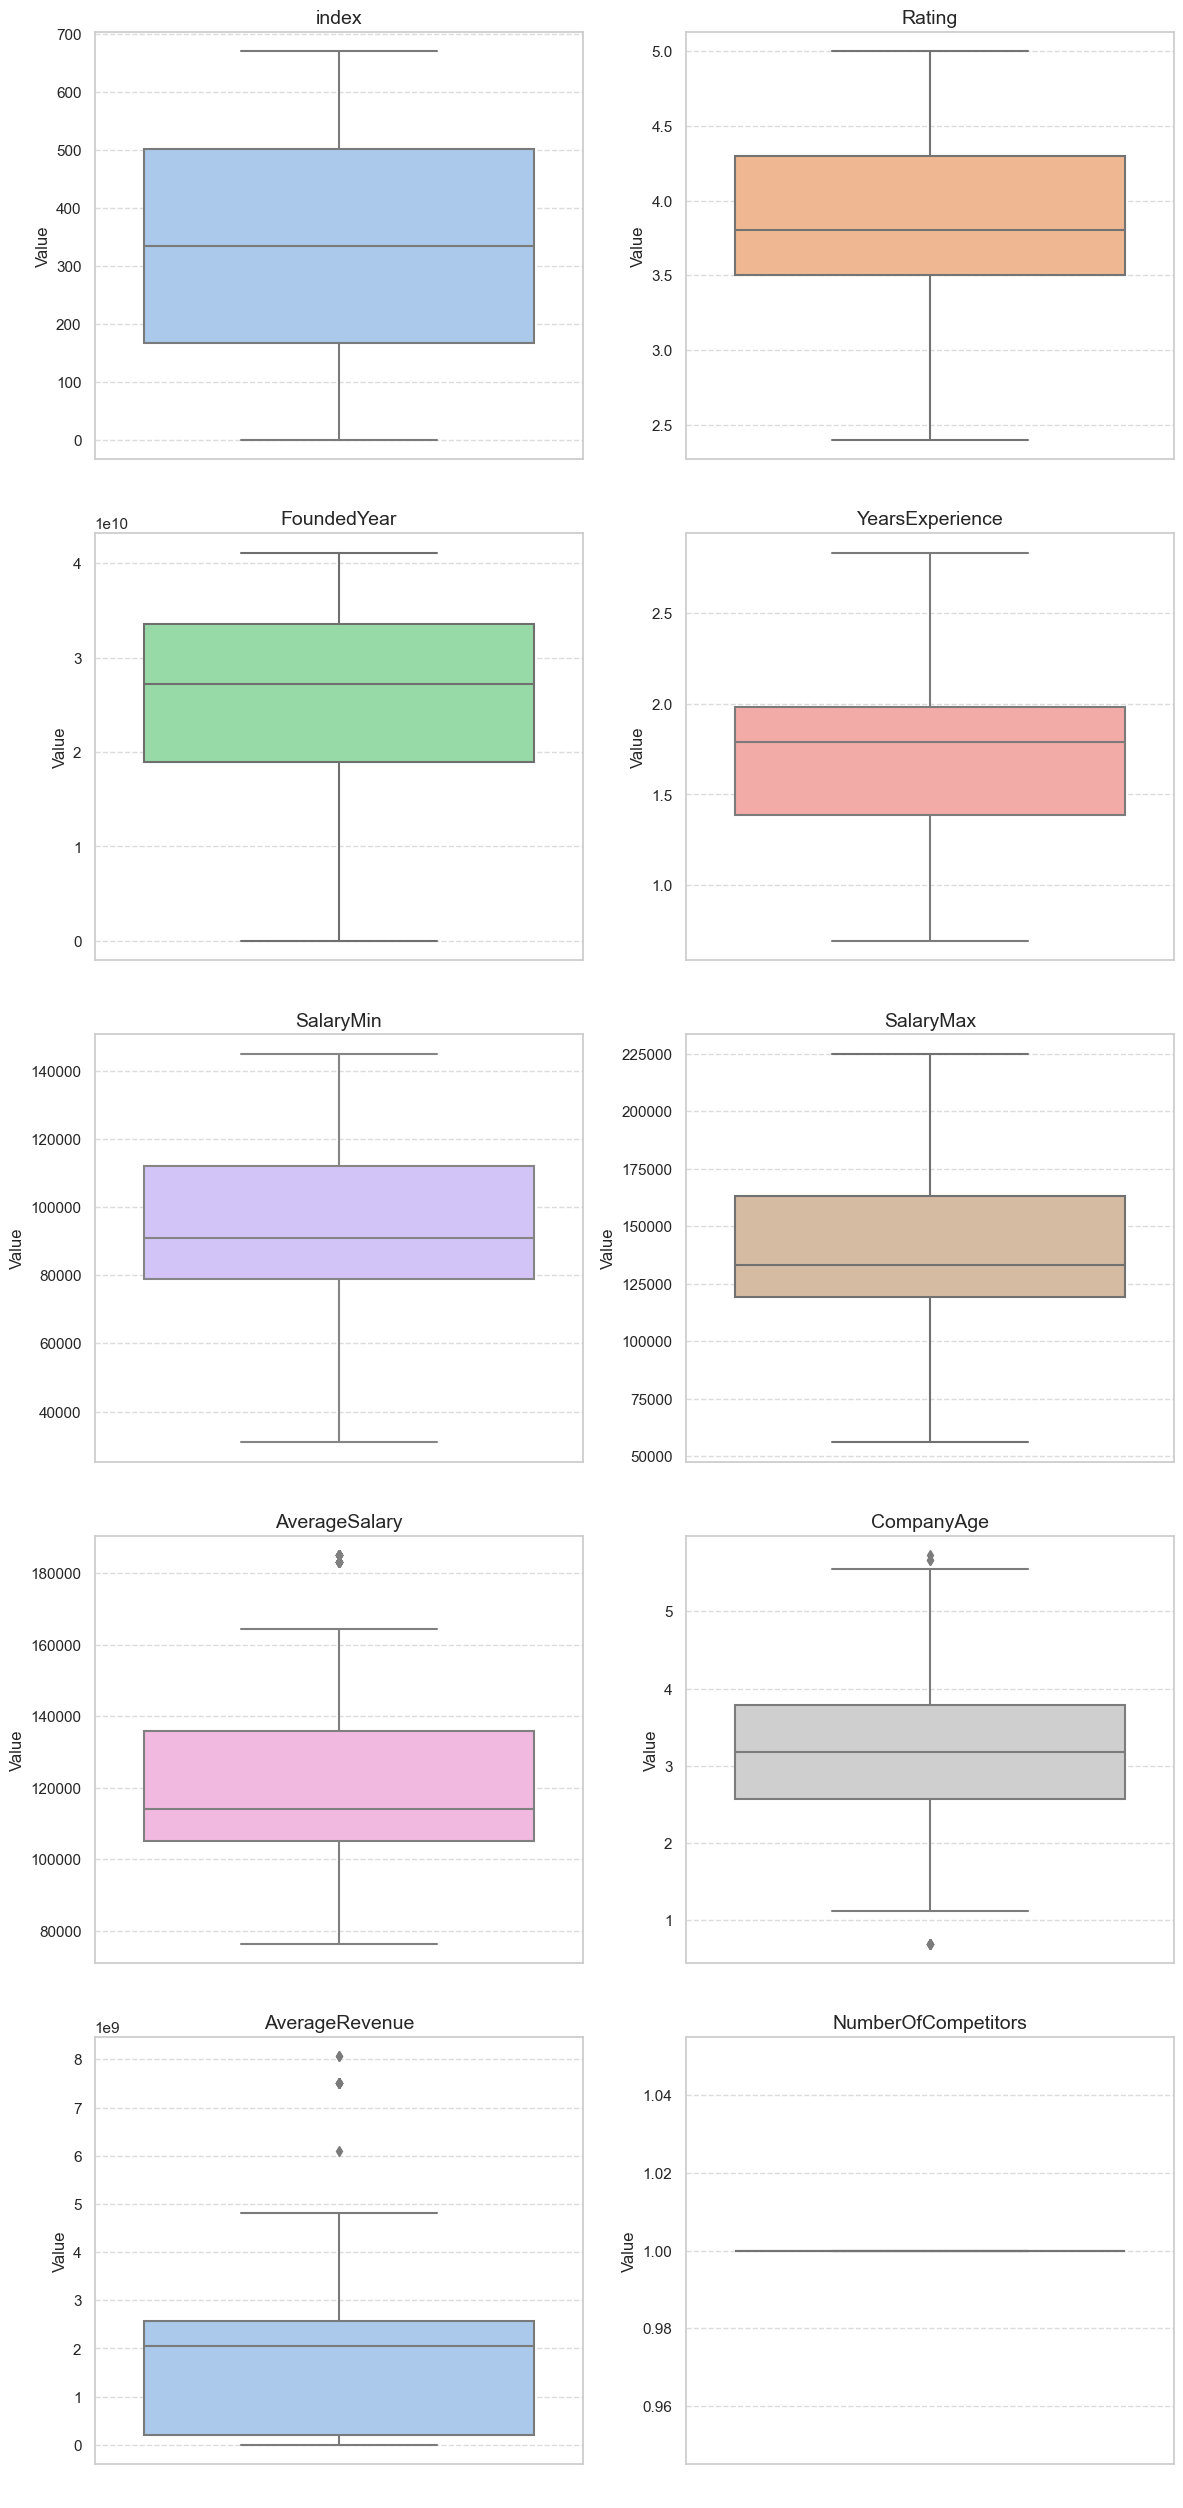

In [285]:
# Let's verify
# Select the numeric col
numeric_col = df.select_dtypes(include='number')
# Set the number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each column and create a boxplot
for i, column in enumerate(numeric_col.columns):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[column], color=sns.color_palette("pastel")[i % 8])  # Use pastel colors
    plt.title(column, fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel(' ', fontsize=12)  # Label for the x-axis (empty for aesthetics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['SalaryMin', 'SalaryMax', 'AverageRevenue']] = scaler.fit_transform(df[['SalaryMin', 'SalaryMax', 'AverageRevenue']])

In [287]:
df.sample(10)

index        JobTitle SalaryEstimate  Rating                 CompanyName  \
277  277.0  data scientist         91-150     3.6                      Jacobs   
91    91.0             mle         79-131     4.4            NuWave Solutions   
377  377.0  data scientist        112-116     3.5      Evolve Vacation Rental   
11    11.0  data scientist        137-171     4.7                    1904labs   
20    20.0  data scientist        137-171     3.2                  Triplebyte   
90    90.0  data scientist         79-131     4.0                 AstraZeneca   
205  205.0   data engineer         79-106     3.6  Alion Science & Technology   
344  344.0  data scientist        122-146     4.2                   Eversight   
88    88.0             mle         79-131     4.8                     Klaviyo   
469  469.0           Other          31-56     3.9                  7Park Data   

    CompanySize   FoundedYear OwnershipType  \
277     10000++  7.503129e+09        Public   
91       51-200  2.717184e+10       Private   
377     201-500  3.500271e+10       Private   
11       51-200  3.874812e+10       Private   
20       51-200  3.797486e+10       Private   
90      10000++  2.546310e+09        Public   
205   1001-5000  2.837016e+10       Private   
344      51-200  3.646489e+10       Private   
88      201-500  3.572789e+10       Private   
469      51-200  3.572789e+10       Private   

                                    Industry                     Sector  ...  \
277     Architectural & Engineering Services          Business Services  ...   
91                               It Services     Information Technology  ...   
377                          Travel Agencies           Travel & Tourism  ...   
11                               It Services     Information Technology  ...   
20              Computer Hardware & Software     Information Technology  ...   
90                 Biotech & Pharmaceuticals  Biotech & Pharmaceuticals  ...   
205                   Research & Development          Business Services  ...   
344  Enterprise Software & Network Solutions     Information Technology  ...   
88              Computer Hardware & Software     Information Technology  ...   
469                   Research & Development          Business Services  ...   

    SalaryMax AverageSalary  State               City  CompanyAge  \
277  0.231027      120500.0     VA            Herndon    4.568655   
91  -0.310969      105000.0     VA        Springfield    3.182898   
377 -0.738861      114000.0     CO             Denver    2.268702   
11   0.830076      154000.0     MO        Saint Louis    1.414524   
20   0.830076      154000.0     NY           New York    1.647569   
90  -0.310969      105000.0     MD       Gaithersburg    5.004068   
205 -1.024122       92500.0     MD  Linthicum Heights    3.073739   
344  0.116923      134000.0     CA          Palo Alto    2.001834   
88  -0.310969      105000.0     MA             Boston    2.143388   
469 -2.450428      114000.0     NY           New York    2.143388   

     AverageRevenue NumberOfCompetitors ExperienceLevel  SalaryCategory  \
277        0.176869                 1.0       Mid-level          Medium   
91        -1.023703                 1.0       Mid-level          Medium   
377        0.243410                 1.0       Mid-level          Medium   
11         0.243410                 1.0       Mid-level          Medium   
20         0.243410                 1.0       Mid-level          Medium   
90         0.176869                 1.0       Mid-level          Medium   
205       -0.150693                 1.0       Mid-level             Low   
344       -1.017854                 1.0       Mid-level          Medium   
88         0.243410                 1.0       Mid-level          Medium   
469        1.791279                 1.0       Mid-level             Low   

                 RevComp  
277      10000000000.0_3  
91           7500000.0_1  
377  2173759259.259259_1  
11   2173759259.2592

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 671
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                668 non-null    float64 
 1   JobTitle             668 non-null    object  
 2   SalaryEstimate       668 non-null    object  
 3   Rating               668 non-null    float64 
 4   CompanyName          668 non-null    category
 5   CompanySize          668 non-null    object  
 6   FoundedYear          668 non-null    float64 
 7   OwnershipType        668 non-null    category
 8   Industry             668 non-null    category
 9   Sector               668 non-null    category
 10  RequiredSkills       668 non-null    object  
 11  EducationLevel       668 non-null    object  
 12  YearsExperience      668 non-null    float64 
 13  SalaryMin            668 non-null    float64 
 14  SalaryMax            668 non-null    float64 
 15  AverageSalary        668 non